In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/istanbul-mall'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Kullanacağımız kütüphaneleri yükleyelim.

import numpy as np 
import pandas as pd 
# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
#Future warningleri görmek istemediğim için susturuyorum.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/kaggle/input/istanbul-mall/customer_data.xlsx
/kaggle/input/istanbul-mall/shopping_mall_data.xlsx
/kaggle/input/istanbul-mall/sales_data.xlsx


# 0. Veri Seti Hazırlığı
- **0.1 Veri Seti Adresi : https://www.kaggle.com/datasets/captaindatasets/istanbul-mall**

- **`customer_data`**: Müşteri bilgilerini içerir.
- **`sales_data`**: Satış bilgilerini içerir.
- **`shopping_mall_data`**: Alışveriş merkezi bilgilerini içerir.


# 1.Veri setini tanıtalım.

In [2]:
customer_data = pd.read_excel('/kaggle/input/istanbul-mall/customer_data.xlsx')
shopping_mall_data = pd.read_excel('/kaggle/input/istanbul-mall/shopping_mall_data.xlsx')
sales_data = pd.read_excel('/kaggle/input/istanbul-mall/sales_data.xlsx')

## 1.1. customer_data veri setinde rastgele eksik veriler oluşturalım.

In [3]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 1.00,
                              seed: int = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame, excluding the customer_id column.
    
    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults to 0.05.
        seed (int): Random seed for reproducibility. Defaults to 42.
    
    Returns:
        pd.DataFrame: DataFrame with random missing values added (excluding customer_id).
    """
    # Get a copy of the dataframe
    df_missing = dataframe.copy()
    columns_to_modify = [col for col in dataframe.columns if col != 'customer_id']
    
    # Obtain the size of the dataframe and the total number of missing values
    df_size = dataframe[columns_to_modify].size
    num_missing = int(df_size * missing_rate)

    # Set seed
    random.seed(seed)

    # Get random row and column indexes to turn them NaN (excluding 'customer_id')
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.choice(columns_to_modify)  # Pick a random column excluding 'customer_id'

        df_missing.at[row_idx, col_idx] = np.nan
        
    return df_missing

# Örnek kullanım
customer_data = add_random_missing_values(dataframe=customer_data,
                                          missing_rate=0.03)

## 1.2. Veri setlerini birleştirelim.
- **3 ayrı veri seti olduğu için birleştirmeye karar verdim ve bundan sonraki işlemlere böyle devam edeceğim.**

1. İlk olarak, **`customer_data`** veri seti ile **`sales_data`** veri setini **`customer_id`** sütunu üzerinden birleştiriyorum. Bu işlemi, pandas'ın `merge()` metodunu kullanarak gerçekleştiriyorum. Bu yöntem, iki veri setini ortak bir sütun üzerinden (bu örnekte `customer_id`) birleştirmemi sağlıyor.Bu veri setine ***`customer_sales_data`*** adını veriyorum.

In [4]:
customer_sales_data = pd.merge(sales_data, customer_data, on='customer_id', how='inner')


2. Şimdi, **`shopping_mall_data`** veri seti ile daha önce oluşturduğumuz **`customer_sales_data`** veri setini **`shopping_mall`** sütunu üzerinden birleştiriyorum. Bu birleştirme işlemi, her iki veri setindeki **`shopping_mall`** sütunu ile yapılır.Bu veri setinede ***`df`*** adını veriyorum.

In [5]:
customer_sales_mall_data = customer_sales_data.merge(shopping_mall_data, on="shopping_mall", how="inner")

In [6]:
#okunabilirlik açısından df olarak atıyorum
df = customer_sales_mall_data 

# 2. **Veri setleri Hakkında Bilgi Ediniyorum**

In [7]:
df.head(10)
# Head fonksiyonu varsayılan olarak 5 değer döndürür bir sayı yazarsanız o kadar veri döndürür bu örnekte 10 tanesini görmek istedim

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall,gender,age,payment_method,construction_year,area (sqm),location,store_count
0,I138884,C241288,Clothing,5,05/08/2022,1500.40,South Coast Plaza,Female,28.0,Credit Card,1967,250000,Costa Mesa,270
1,I317333,C111565,Shoes,3,12/12/2021,1800.51,Beverly Center,Male,21.0,Debit Card,1982,111000,Los Angeles,160
2,I127801,C266599,Clothing,1,09/11/2021,300.08,Westfield Century City,Male,20.0,Cash,1964,133000,Los Angeles,200
3,I173702,C988172,Shoes,5,05/16/2021,3000.85,Stanford Shopping Center,Female,66.0,Credit Card,1956,120000,Palo Alto,140
4,I337046,C189076,Books,4,10/24/2021,60.60,South Coast Plaza,Female,53.0,Cash,1967,250000,Costa Mesa,270
5,I227836,C657758,Clothing,5,05/24/2022,1500.40,Beverly Center,Female,28.0,Credit Card,1982,111000,Los Angeles,160
6,I121056,C151197,Cosmetics,1,03/13/2022,40.66,Westfield Valley Fair,Female,49.0,Cash,1986,220000,Santa Clara,230
7,I293112,C176086,Clothing,2,01/13/2021,600.16,Del Amo Fashion Center,Female,32.0,Credit Card,1961,232000,Torrance,220
8,I293455,C159642,Clothing,3,04/11/2021,900.24,Westfield Century City,Male,69.0,Credit Card,1964,133000,Los Angeles,200
9,I326945,C283361,Clothing,2,08/22/2021,600.16,South Coast Plaza,Female,60.0,Credit Card,1967,250000,Costa Mesa,270


## 2.1 Değişken Açıklamaları
- *`customer_id:`*: Müşteri Kimliği – Müşteriyi tanımlayan benzersiz kimlik numaraı.
- *`category:`* Ürün Kategorisi – Ürünün ait olduğu kategori (örneğin: giyim, elektronik ).
- *`quantity:`* Miktar – Satın alınan ürünün adedi.
- *`invoice date:`* Fatura Tarihi – Satın almanın gerçekleştiği tarih.
- *`price:`* Fiyat – Ürünün birim fiyatı.
- *`shopping_mall:`* Alışveriş Merkezi – Ürünün satıldığı alışveriş merkezi adı.
- *`gender:`* Cinsiyet – Müşterinin cinsiyeti (kadın/erkek).
- *`age:`* Yaş – Müşterinin yaşı.
- *`payment_method:`* Ödeme Yöntemi – Müşterinin kullandığı ödeme yöntemi (kredi kartı, nakit, vb.).
- *`construction_year:`* İnşaat Yılı – Alışveriş merkezinin inşa edildiği yıl.
- *`area (sqm):`* Alan(m²) – Alışveriş merkezinin toplam alanı, metrekare cinsinden.
- *`location:`* Konum – Alışveriş merkezinin konumu (şehir,ilçe, vb.).
- *`store_count:`* Mağaza Sayısı – Alışveriş merkezinde bulunan toplam 
lunan toplam mağaza sayısı.

In [8]:
df.shape
# Veri yapısının boyutlarını döndürür. veri setinizde kaç satır ve sütun olduğunu öğrenmenizi sağlar.
# 94466 satır , 14 sutün

(94466, 14)

In [9]:
df.info()
# Veri seti hakkında temel bilgiler sağlar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94466 entries, 0 to 94465
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   invoice_no         94466 non-null  object 
 1   customer_id        94466 non-null  object 
 2   category           94466 non-null  object 
 3   quantity           94466 non-null  int64  
 4   invoice date       94466 non-null  object 
 5   price              94466 non-null  float64
 6   shopping_mall      94466 non-null  object 
 7   gender             91762 non-null  object 
 8   age                91529 non-null  float64
 9   payment_method     91586 non-null  object 
 10  construction_year  94466 non-null  int64  
 11  area (sqm)         94466 non-null  int64  
 12  location           94466 non-null  object 
 13  store_count        94466 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 10.1+ MB


Elimizdeki değişkenlerin tipleri

In [10]:
df.dtypes
# dtypes her sütunun veri türünü içeren bir seri döndürür

invoice_no            object
customer_id           object
category              object
quantity               int64
invoice date          object
price                float64
shopping_mall         object
gender                object
age                  float64
payment_method        object
construction_year      int64
area (sqm)             int64
location              object
store_count            int64
dtype: object

In [11]:
df.describe()
#Veri setindeki verilerin açıklamasını döndürür.

,quantity,price,age,construction_year,area (sqm),store_count
count,94466.000000,94466.000000,91529.000000,94466.000000,94466.000000,94466.000000
mean,3.003864,689.324139,43.432573,1969.614094,183116.327568,208.818623
std,1.412759,940.614617,14.994791,11.676772,60073.526525,42.534204
min,1.000000,5.230000,18.000000,1956.000000,56000.000000,140.000000
25%,2.000000,45.450000,30.000000,1961.000000,133000.000000,180.000000
50%,3.000000,203.300000,43.000000,1967.000000,220000.000000,220.000000
75%,4.000000,1200.320000,56.000000,1977.000000,232000.000000,230.000000
max,5.000000,5250.000000,69.000000,2002.000000,250000.000000,270.000000


# 3. Eksik verilerin analizi ve eksik verilere bakış.

## 3.1 Eksik verilerin yüzdesi

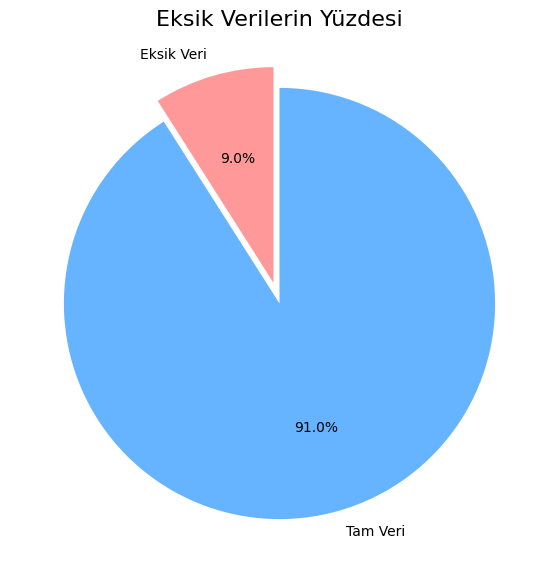

In [12]:
# Eksik verilerin yüzdesini hesapla
missing_percentage = df.isnull().mean() * 100
missing_count = missing_percentage.sum()

# Verinin geri kalan kısmı (eksik olmayan veriler)
not_missing_percentage = 100 - missing_count
labels = ['Eksik Veri', 'Tam Veri']
sizes = [missing_count, not_missing_percentage]
colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.1, 0))  # explode eksik veriyi biraz öne çıkarır
plt.title('Eksik Verilerin Yüzdesi', fontsize=16)

# Grafiği göster
plt.show()


In [13]:
df.isnull().sum()
# isna().sum()

invoice_no              0
customer_id             0
category                0
quantity                0
invoice date            0
price                   0
shopping_mall           0
gender               2704
age                  2937
payment_method       2880
construction_year       0
area (sqm)              0
location                0
store_count             0
dtype: int64

**`df`** veri setinin 
- *`gender`* sutünunda ***2844***,
- *`age`* sutünunda ***3068***,
- *`payment_method`* sutünunda ***3035***
tane boş alan var.

## 3.1.0 Eksik alanları cinsiyete göre ayırıyorum


In [14]:
# Cinsiyeti Eksik olan veriler
missing_gender = df['gender'].isnull().sum()

# Ödeme Şekli Eksik Olanlar
missing_payment_female = df[df['gender'] == 'Female']['payment_method'].isnull().sum()
missing_payment_male = df[df['gender'] == 'Male']['payment_method'].isnull().sum()

# Cinsiyeti 'Male' olanların eksik yaş verilerini sayma
missing_male_age = df[df['gender'] == 'Male']['age'].isnull().sum()

# Cinsiyeti 'Female' olanların eksik yaş verilerini sayma
missing_female_age = df[df['gender'] == 'Female']['age'].isnull().sum()

# Cinsiyet yaş ödeme şekli eksik olan veriler
missing_age_gender_data = df[
    (df['age'].isnull()) & 
    (df['gender'].isnull()) & 
    (df['payment_method'].isnull())
]

# Eksik yaş ve cinsiyet verilerini görüntüleme

print(f"Yaş cinsiyet ödeme şekli eksik olan veri sayısı: {missing_age_gender_data.shape[0]}")
print("-----------------------------------")
print(
"Yaşı Eksik Olan Erkekler",missing_male_age,
"\n"
"Yaşı Eksik Olan Kadınlar",missing_female_age,
)
print("-----------------------------------")
print(
"Ödeme Şekli Eksik Olan Erkekler",missing_payment_male,
"\n"
"Ödeme Şekli Eksik Olan Kadınlar",missing_payment_female
)
print("-----------------------------------")
print(
"Cinsiyeti Eksik olan veriler",missing_gender
)


Yaş cinsiyet ödeme şekli eksik olan veri sayısı: 2
-----------------------------------
Yaşı Eksik Olan Erkekler 1140 
Yaşı Eksik Olan Kadınlar 1731
-----------------------------------
Ödeme Şekli Eksik Olan Erkekler 1119 
Ödeme Şekli Eksik Olan Kadınlar 1664
-----------------------------------
Cinsiyeti Eksik olan veriler 2704


## 3.1 Eksik verilerin nasıl dolduralacağı
1. *`Age`*
2. *`Gender`*
3. *`payment_method`*
4. *`Age`* + *`Gender`* + *`payment_method`* 
olarak doldurmaya başlayalım

## 3.1.1 *`Age`* sütunu 
* Boş alanları tüm müşterilerin yaş ortalamasını alarak veya kadın ve erkek müşterilerin ayrı ayrı yaş ortalamasını alarak doldurabiliriz.
* Ben kadın ve erkek müşterilerin yaş ortalamasını ayrı ayrı alarak eksik alanları dolduracağım

In [15]:
# Kadınların yaş ortalamasını hesaplayalım
female_age_mean = customer_data[customer_data['gender'] == 'Female']['age'].mean()

# Yaşı eksik olan kadınları, kadınların yaş ortalaması ile doldurun
# Yaşı eksik olan kadınların yaş ortalaması
# 43.453290225778794
df.loc[
    (df['gender'] == 'Female') & (df['age'].isnull()), 'age'] = female_age_mean
# Cinsiyeti 'Female' olanların eksik yaş verilerini sayma
missing_female_age = df[df['gender'] == 'Female']['age'].isnull().sum()
# Hiç eksik veri kalmadığını doğruluyoruz
print('Age sutünü eksik olan kadınların sayısı : ',missing_female_age)

Age sutünü eksik olan kadınların sayısı :  0


In [16]:
# Erkeklerin yaş ortalamasını hesaplayın
male_age_mean = df[df['gender'] == 'Male']['age'].mean()
# print(male_age_mean)
# ortalama 43.39021656907517
# Yaşı eksik olan erkeklerin, erkeklerin yaş ortalaması ile doldurun
df.loc[
    (df['gender'] == 'Male') & (df['age'].isnull()), 'age'] = male_age_mean
# Cinsiyeti 'Male' olanların eksik yaş verilerini sayma
missing_male_age = df[df['gender'] == 'Male']['age'].isnull().sum()
# Hiç eksik veri kalmadığını doğruluyoruz
print('Age sutünü eksik olan erkeklerin sayısı : ',missing_male_age)

Age sutünü eksik olan erkeklerin sayısı :  0


## 3.1.2 *`payment_method`* sütunu
* En yaygın olan ödeme yöntemi ile boş olan verileri dolduruyorum.

  Payment Method  Count
0           Cash  40927
1    Credit Card  32117
2     Debit Card  18542
En fazla kullanılan ödeme yöntemi Cash


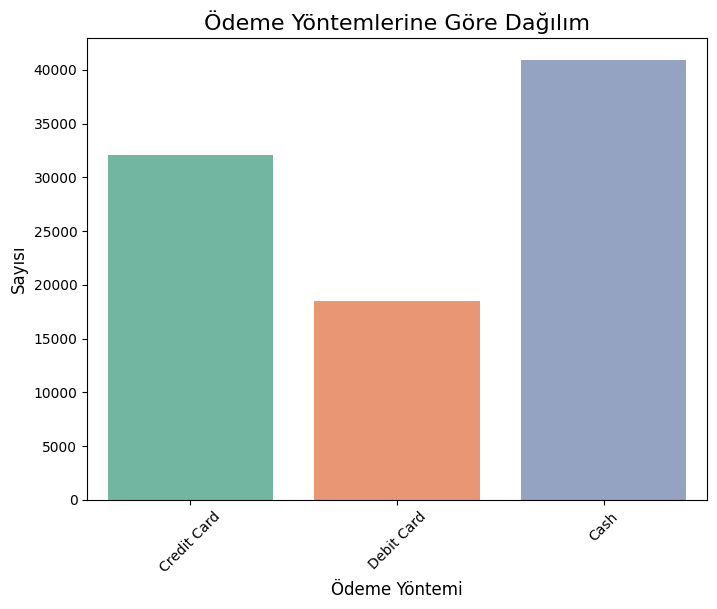

In [17]:
# Ödeme yöntemlerine göre grup sayımı yapıp, tablo oluşturuyoruz
payment_summary = df['payment_method'].value_counts().reset_index()
payment_summary.columns = ['Payment Method', 'Count'] 
print(payment_summary)

# En fazla kullanılan ödeme yöntemini buluyoruz
most_common_payment_method = df['payment_method'].mode()[0]  # En sık kullanılan ödeme yöntemini alıyoruz
print(f"En fazla kullanılan ödeme yöntemi {most_common_payment_method}")

plt.figure(figsize=(8,6))
sns.countplot(x='payment_method', data=df, palette='Set2')
plt.title('Ödeme Yöntemlerine Göre Dağılım', fontsize=16)
plt.xlabel('Ödeme Yöntemi', fontsize=12)
plt.ylabel('Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [18]:

# Eksik ödeme yöntemlerini en fazla kullanılan yöntemle dolduruyoruz
df['payment_method'].fillna(most_common_payment_method, inplace=True)

In [19]:
# Ödeme Yönteminde boş alan kalmadığını kontrol ediyorum.
df['payment_method'].isnull().sum()

0

In [20]:
#Boş cinsiyet verileri ile ilgili satırları filtreleme
missing_gender_data = df[df['gender'].isnull()]

# Bu satırlarda hangi ödeme yöntemlerinin daha fazla kullanıldığını görmek
payment_method_distribution = missing_gender_data['payment_method'].value_counts()

print(payment_method_distribution)

payment_method
Cash           1285
Credit Card     888
Debit Card      531
Name: count, dtype: int64


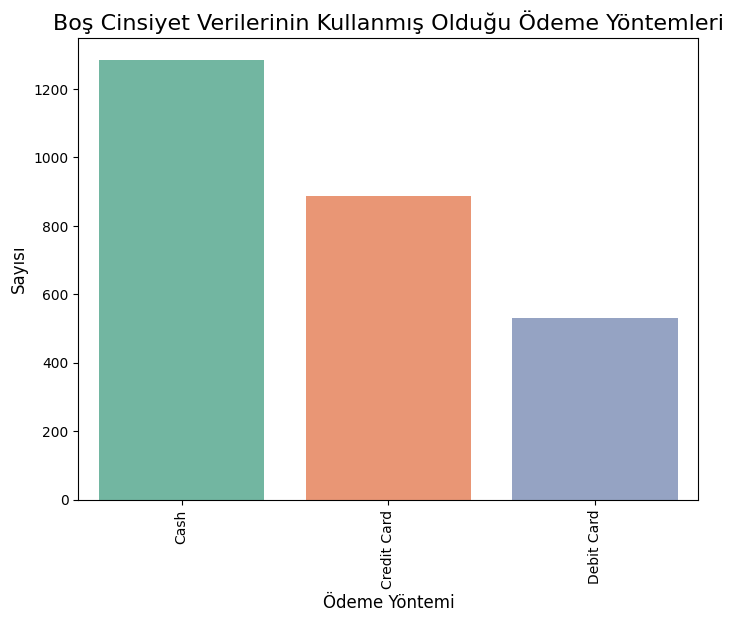

In [21]:
# Boş cinsiyet verileri ile ödeme yöntemi dağılımını görselleştirme
plt.figure(figsize=(8,6))
sns.countplot(x='payment_method', data=missing_gender_data, palette='Set2')
plt.title('Boş Cinsiyet Verilerinin Kullanmış Olduğu Ödeme Yöntemleri', fontsize=16)
plt.xlabel('Ödeme Yöntemi', fontsize=12)
plt.ylabel('Sayısı', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [22]:
# Cash kullananların cinsiyet dağılımını görmek
cash_gender_distribution = df[df['payment_method'] == 'Cash']['gender'].value_counts()
print(cash_gender_distribution)

# En yaygın cinsiyet, Cash ödeme yöntemi ile hangi cinsiyet daha fazla ilişkilendiriliyorsa ona göre eksik cinsiyet verilerini doldurabiliriz
most_common_gender_for_cash = cash_gender_distribution.idxmax()
print(f"En yaygın cinsiyet: {most_common_gender_for_cash}")

# Eksik cinsiyet verilerini, Cash ödeme yöntemi kullananların en yaygın cinsiyetine göre doldurmak
df['gender'].fillna(most_common_gender_for_cash, inplace=True)

gender
Female    25373
Male      17149
Name: count, dtype: int64
En yaygın cinsiyet: Female


# 4 Kategorik & Sayısal veriler

In [23]:
# Kategorik değişkenler: string ve category türünde olanlar
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Sayısal değişkenler: int ve float türünde olanlar
numerical_columns = df.select_dtypes(include=['number']).columns

print("Kategorik Değişkenler:")
print(categorical_columns)

print("\nSayısal Değişkenler:")
numerical_columns

Kategorik Değişkenler:
Index(['invoice_no', 'customer_id', 'category', 'invoice date',
       'shopping_mall', 'gender', 'payment_method', 'location'],
      dtype='object')

Sayısal Değişkenler:


Index(['quantity', 'price', 'age', 'construction_year', 'area (sqm)',
       'store_count'],
      dtype='object')

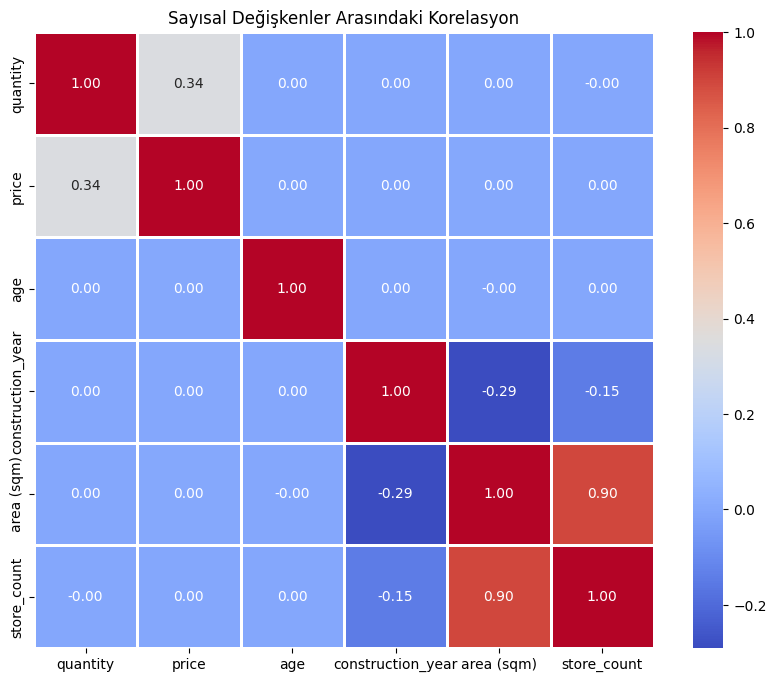

In [24]:
# Sayısal değişkenlerin korelasyon matrisini hesaplıyoruz.
correlation_matrix = df[numerical_columns].corr()
# Korelasyon matrisini ısı haritası olarak görselleştiriyoruz.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Sayısal Değişkenler Arasındaki Korelasyon")
plt.show()

## 4.1 Korelasyon Analizi
1. ***Mağaza Sayısı (store_count) ile Alan (area (sqm)):***
- Korelasyon Katsayısı: **0.90**
- Bu, çok güçlü bir pozitif ilişkiyi gösterir.
- Alışveriş merkezinin büyüklüğü (alanı) arttıkça, içerdiği mağaza sayısının da arttığını belirtir. Daha büyük bir alışveriş merkezinin genellikle daha fazla mağaza barındırması beklenen bir durumdur.
 <hr>
2. ***Miktar (quantity) ile Fiyat (price):***
- Korelasyon Katsayısı: **0.34**
- Pozitif Korelasyon: Bu, fiyat ile satın alınan miktar arasında zayıf bir pozitif ilişki olduğunu gösterir.
- Fiyat arttıkça, satın alınan miktarın da hafifçe artma eğiliminde olduğu söylenebilir. Ancak bu ilişki güçlü olmadığından, diğer faktörler de satın alma davranışını etkileyebilir.
<hr>
3. ***Yapım Yılı (construction_year) ile Mağaza Sayısı (store_count):***
- Korelasyon Katsayısı: **-0.15**
- Negatif Korelasyon: Bu, zayıf bir ters ilişki olduğunu gösterir.
- Alışveriş merkezinin yapım yılı ilerledikçe (daha yeni yapılarda), mağaza sayısının biraz azalma eğiliminde olabileceği ima edilir. Ancak bu ilişkinin etkisi oldukça zayıf ve belirgin bir sonuç çıkarmak zor.
 <hr>
4. **Yapım Yılı (construction_year) ile Alan (area)(sqm):**
- Korelasyon Katsayısı : **-0.29**
- Negatif Korelasyon: Yapım yılı ile alan arasında hafif bir ters ilişki olduğunu gösterir.
- Yani, alışveriş merkezlerinin yapım yılı arttıkça, bunların alanlarının küçülme eğiliminde olabileceği anlamına gelir. Ancak bu ilişki oldukça zayıftır.

# 5 - Cinsiyete göre yapılan analizler

   gender  customer_id
0  Female        57633
1    Male        36833


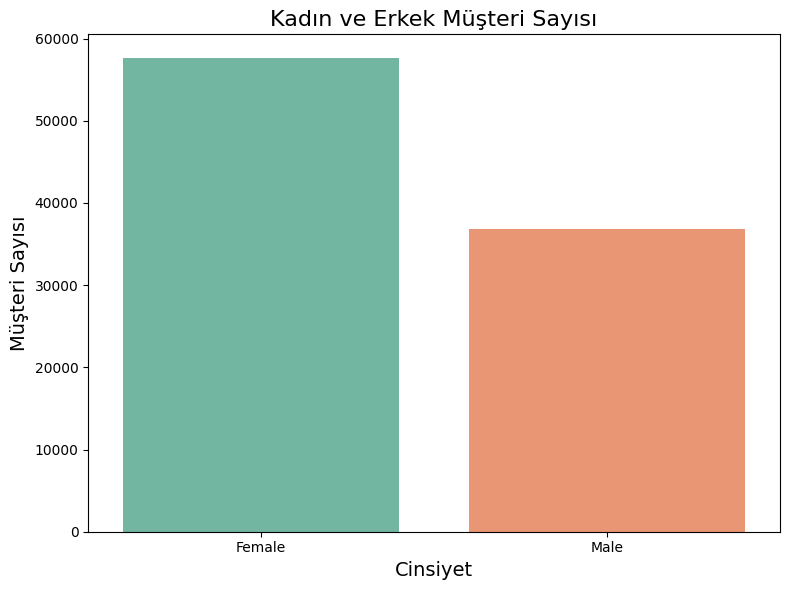

In [25]:
# Cinsiyet bazında müşteri sayısını hesaplıyoruz
gender_customer_count = df.groupby('gender')['customer_id'].nunique().reset_index()
print(gender_customer_count)
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='customer_id', data=gender_customer_count, palette="Set2")

plt.title("Kadın ve Erkek Müşteri Sayısı", fontsize=16)
plt.xlabel("Cinsiyet", fontsize=14)
plt.ylabel("Müşteri Sayısı", fontsize=14)
plt.tight_layout()
plt.show()



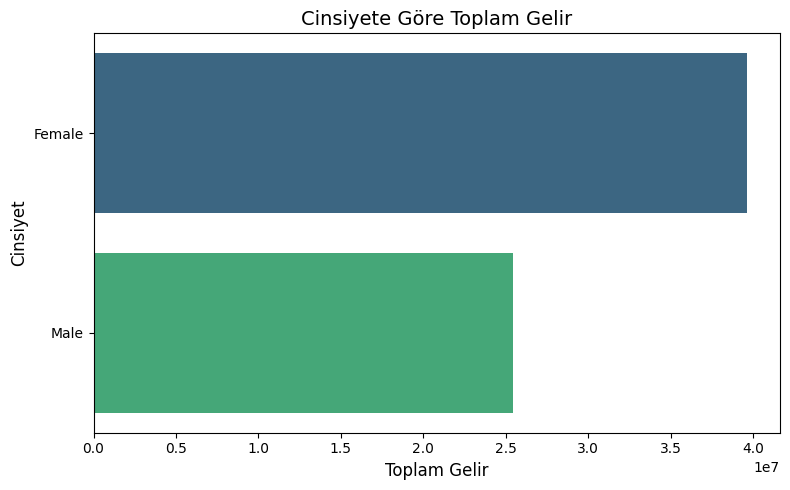

,gender,toplam_miktar,toplam_kazanc
0,Female,173100,39649882.57
1,Male,110663,25467811.50


In [26]:
# Cinsiyete göre toplam satış miktarı ve geliri
gender_sales = df.groupby('gender').agg(
    toplam_miktar=('quantity', 'sum'),
    toplam_kazanc=('price', 'sum')
).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(y='gender', x='toplam_kazanc', data=gender_sales, palette="viridis", orient='h')
plt.title("Cinsiyete Göre Toplam Gelir", fontsize=14)
plt.xlabel("Toplam Gelir", fontsize=12)
plt.ylabel("Cinsiyet", fontsize=12)
plt.tight_layout()
plt.show()
gender_sales


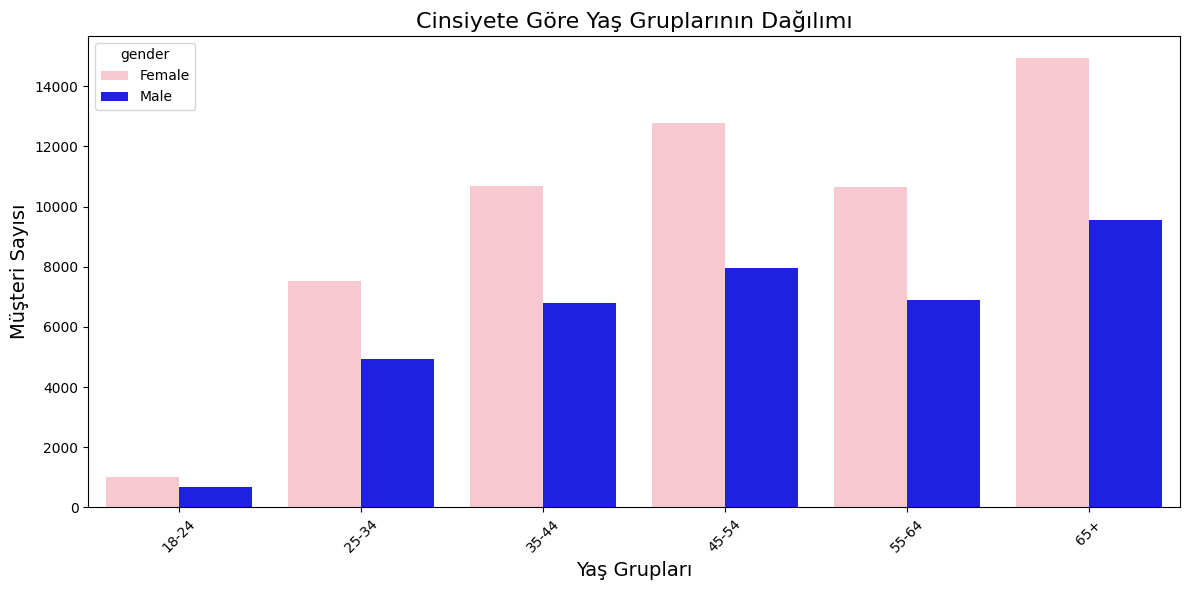

In [27]:
# Yaş grubu aralıklarını ve etiketlerini doğru şekilde belirliyoruz.
bins = [0, 18, 25, 35, 45, 55, float('inf')]  # Yaş aralıkları
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Yaş grubu etiketleri

# # 'age' sütununa göre yaş gruplarını oluşturuyoruz.
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Cinsiyete göre yaş gruplarını sayıyoruz.
age_gender_group = df.groupby(['gender', 'age_group']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
# Cinsiyete göre yaş gruplarının dağılımını göstermek için barplot kullanıyoruz.
sns.barplot(x='age_group', y='count', hue='gender', data=age_gender_group, palette={'Female': 'pink', 'Male': 'blue'})
plt.title("Cinsiyete Göre Yaş Gruplarının Dağılımı", fontsize=16)
plt.xlabel("Yaş Grupları", fontsize=14)
plt.ylabel("Müşteri Sayısı", fontsize=14)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## 5.2 Cinsiyetlere göre en çok alışveriş yapılan kategori

Kadınların En Çok Harcadığı Kategoriler:
   gender    category  toplam_satis
1  Female    Clothing   18039909.36
4  Female       Shoes   10390743.21
6  Female  Technology    9143400.00
2  Female   Cosmetics    1076310.86
7  Female        Toys     634547.20

Erkeklerin En Çok Harcadığı Kategoriler:
   gender    category  toplam_satis
9    Male    Clothing   11481360.88
12   Male       Shoes    6860543.27
14   Male  Technology    5809650.00
10   Male   Cosmetics     683901.20
15   Male        Toys     396641.28


<Figure size 700x400 with 0 Axes>

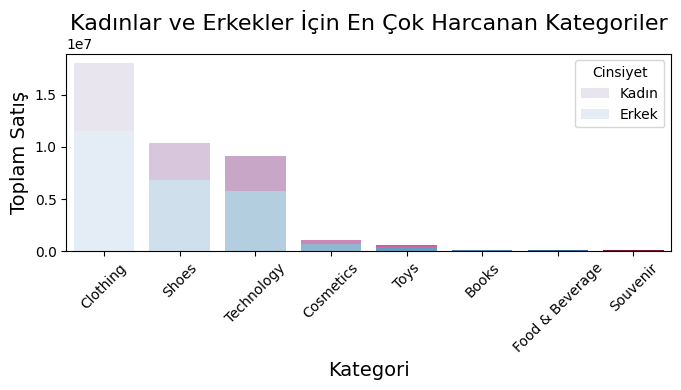

In [28]:
# Cinsiyet ve kategoriye göre toplam satışları hesaplama
gender_category_sales = df.groupby(['gender', 'category']).agg(
    toplam_satis=('price', 'sum')
).reset_index()

# Kadınlar ve erkekler için en çok harcanan kategorileri bulma
female_sales = gender_category_sales[gender_category_sales['gender'] == 'Female'].sort_values('toplam_satis', ascending=False)
male_sales = gender_category_sales[gender_category_sales['gender'] == 'Male'].sort_values('toplam_satis', ascending=False)

# En çok harcamalar
print("Kadınların En Çok Harcadığı Kategoriler:")
print(female_sales.head())

print("\nErkeklerin En Çok Harcadığı Kategoriler:")
print(male_sales.head())

plt.figure(figsize=(7, 4))
plt.figure(figsize=(7, 4))
# Kadınlar için dikey bar grafiği
sns.barplot(x='category', y='toplam_satis', data=female_sales, palette="PuRd", label="Kadın", errorbar=None)
# Erkekler için dikey bar grafiği
sns.barplot(x='category', y='toplam_satis', data=male_sales, palette="Blues", label="Erkek", errorbar=None)

plt.title("Kadınlar ve Erkekler İçin En Çok Harcanan Kategoriler", fontsize=16)
plt.xlabel("Kategori", fontsize=14)
plt.ylabel("Toplam Satış", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Cinsiyet', loc='upper right')
plt.tight_layout()
plt.show()

# Genel Analiz

- ***`Giyim ve Ayakkabı: `*** Hem kadınlar hem de erkekler, giyim ve ayakkabı kategorilerinde en çok harcama yapmış. 
- ***`Teknoloji:`*** Teknoloji ürünlerine kadınlar daha fazla harcama yapmış. Bu durum, kadınların teknolojiye olan ilgisinin arttığını ve teknolojik ürünleri sıkça tercih ettiklerini gösteriyor.
- ***`Kozmetik ve Oyuncaklar:`*** Kadınlar kozmetik ürünlerine erkeklerden çok daha fazla harcama yapmış. Oyuncak kategorisinde ise kadınlar daha fazla harcama yapmış olsa da, genel olarak her iki cinsiyetin de oyuncaklara harcaması daha düşük seviyelerde kalmış.

# 6 - Yaşa göre yapılan analizler

## 6.1 Yaş Gruplarının Satın Alma Frekansı

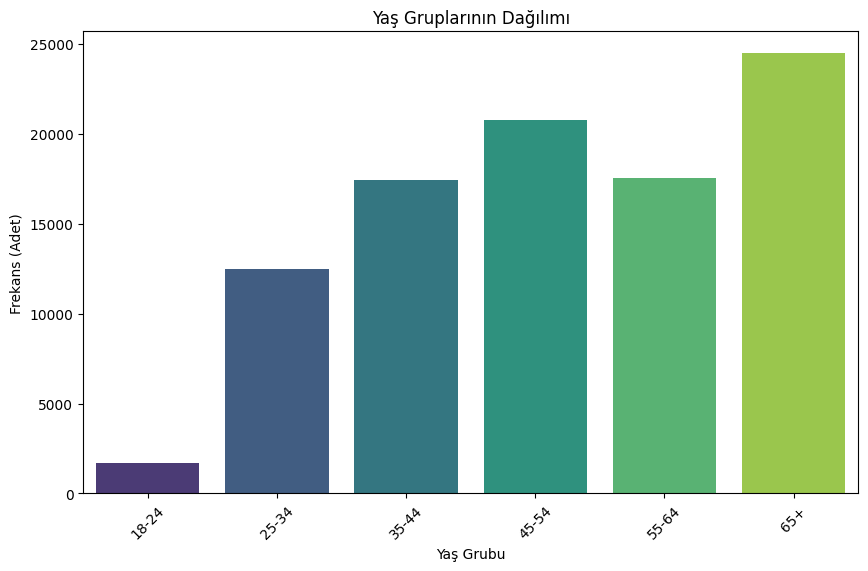

In [29]:
# Yaş gruplarının frekansını hesapla
age_group_distribution = df['age_group'].value_counts().reset_index()
age_group_distribution.columns = ['age_group', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='count', data=age_group_distribution, palette="viridis")
plt.title("Yaş Gruplarının Dağılımı")
plt.xlabel("Yaş Grubu")
plt.ylabel("Frekans (Adet)")
plt.xticks(rotation=45)
plt.show()


## 6.2 Yaş Gruplarının Kategorilere Göre Toplam Satışı

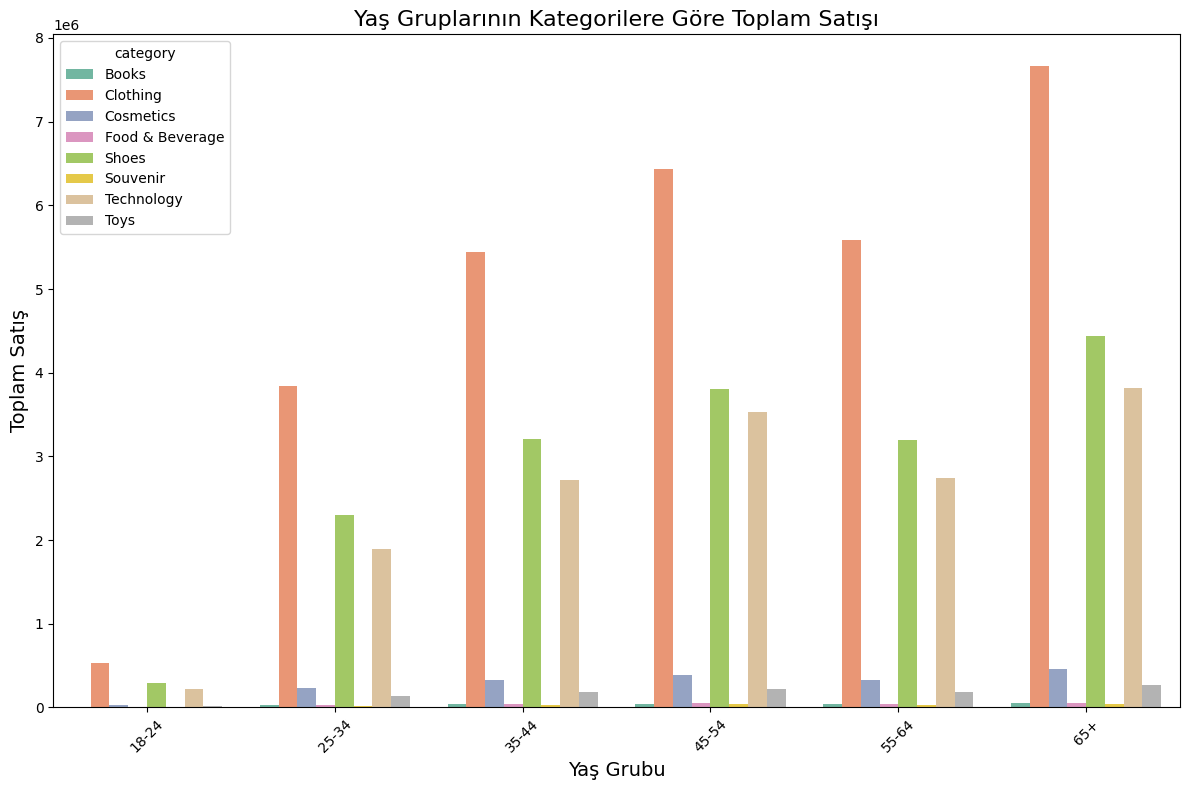

,age_group,category,total_sales,customer_count
0,18-24,Books,4605.60,96
1,18-24,Clothing,528140.80,602
2,18-24,Cosmetics,31145.56,245
3,18-24,Food & Beverage,3891.12,262
4,18-24,Shoes,295283.64,159
5,18-24,Souvenir,3659.76,103
6,18-24,Technology,225750.00,78
7,18-24,Toys,19031.04,162
8,25-34,Books,29709.15,635
9,25-34,Clothing,3843124.56,4319


In [30]:

# Yaş grubu ve kategoriye göre gruplama ve toplam harcama hesaplama
age_category_sales = df.groupby(['age_group', 'category']).agg(
    total_sales=('price', 'sum'),
    customer_count=('customer_id', 'nunique')
).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='total_sales', hue='category', data=age_category_sales, palette="Set2")
plt.title("Yaş Gruplarının Kategorilere Göre Toplam Satışı", fontsize=16)
plt.xlabel("Yaş Grubu", fontsize=14)
plt.ylabel("Toplam Satış", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
age_category_sales

## 6.3 Yıl Bazında Yaş Gruplarına Göre Satışlar

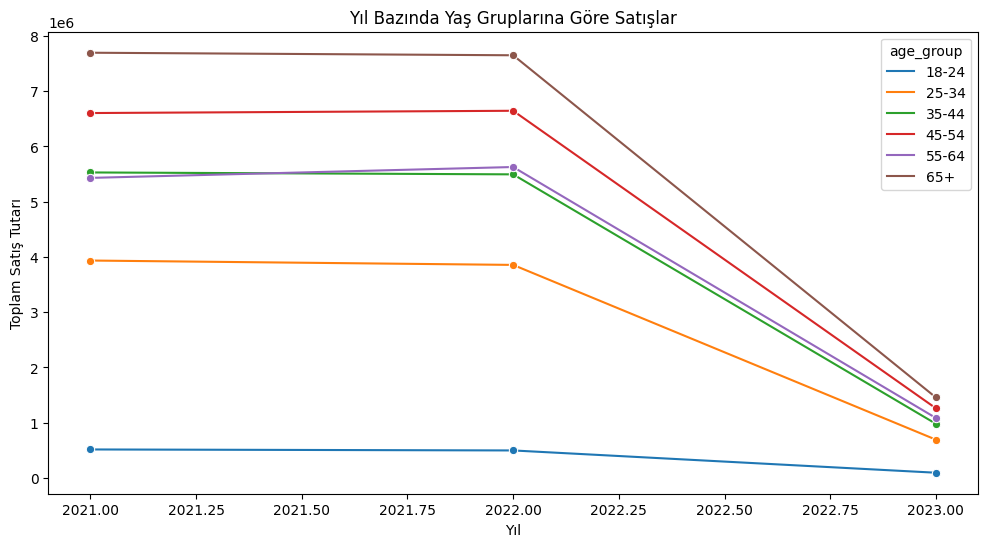

In [31]:
# 'invoice date' sütununu datetime formatına dönüştürme
df['invoice date'] = pd.to_datetime(df['invoice date'])

# 'year' sütunu ekliyoruz ve 'invoice date' sütunundan yıl bilgisi
df['year'] = df['invoice date'].dt.year

# Yaş grubu ve yıl bazında toplam satışları hesaplıyoruz
age_year_sales = df.groupby(['year', 'age_group'])['price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', hue='age_group', data=age_year_sales, marker='o')
plt.title("Yıl Bazında Yaş Gruplarına Göre Satışlar")
plt.xlabel("Yıl")
plt.ylabel("Toplam Satış Tutarı")
plt.show()


## 6.4 Yaş Gruplarına Göre Ödeme Yöntemlerinin Dağılımı

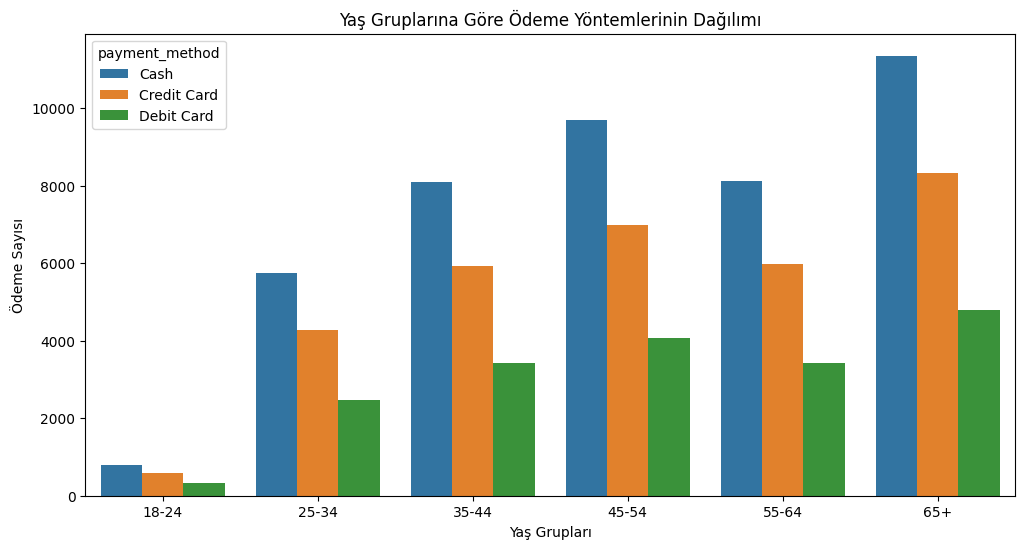

In [32]:
# Yaş grubu ve ödeme yöntemi bazında ödeme sayısını hesaplıyoruz
age_payment_methods = df.groupby(['age_group', 'payment_method']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='count', hue='payment_method', data=age_payment_methods)
plt.title("Yaş Gruplarına Göre Ödeme Yöntemlerinin Dağılımı")
plt.xlabel("Yaş Grupları")
plt.ylabel("Ödeme Sayısı")
plt.show()

## 6.5 Yaş gruplarına göre ürün kategorilerinin satışları

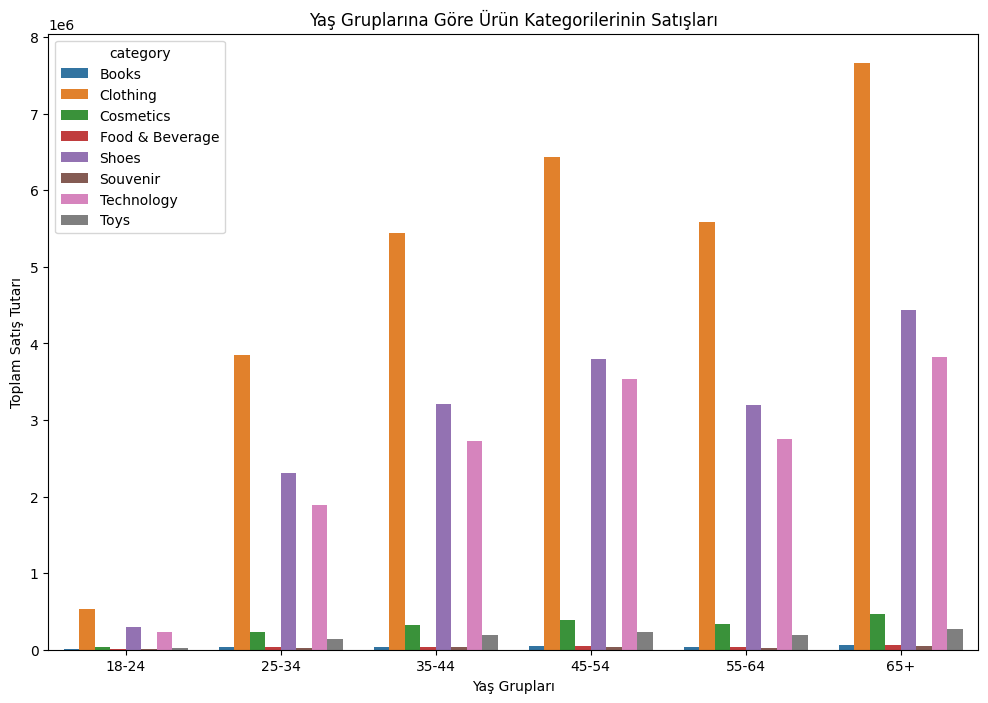

In [33]:
# Yaş grubu ve kategori bazında satışları topluyoruz
age_category_sales = df.groupby(['age_group', 'category'])['price'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='price', hue='category', data=age_category_sales)
plt.title("Yaş Gruplarına Göre Ürün Kategorilerinin Satışları")
plt.xlabel("Yaş Grupları")
plt.ylabel("Toplam Satış Tutarı")
plt.show()


## 6.6 Yaş gruplarına göre satın alma frekansı

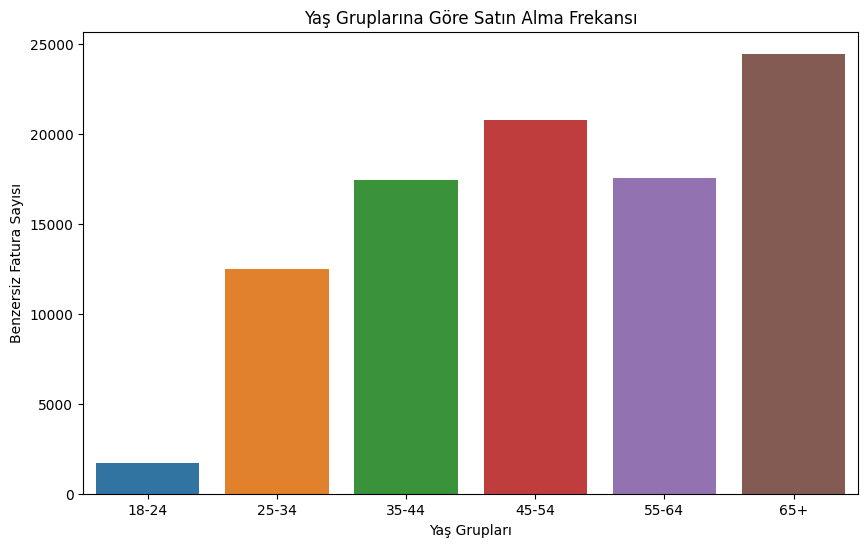

In [34]:
# Yaş grubu bazında yapılan işlem sayısını hesaplıyoruz
age_purchase_frequency = df.groupby('age_group')['invoice_no'].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='invoice_no', data=age_purchase_frequency)
plt.title("Yaş Gruplarına Göre Satın Alma Frekansı")
plt.xlabel("Yaş Grupları")
plt.ylabel("Benzersiz Fatura Sayısı")
plt.show()


## 6.7 Yaş gruplarına göre toplam gelir

Yaş Gruplarına Göre Toplam Gelir:
age_group
18-24     1111507.52
25-34     8486099.76
35-44    12005879.27
45-54    14511725.01
55-64    12145091.60
65+      16803617.88
Name: price, dtype: float64


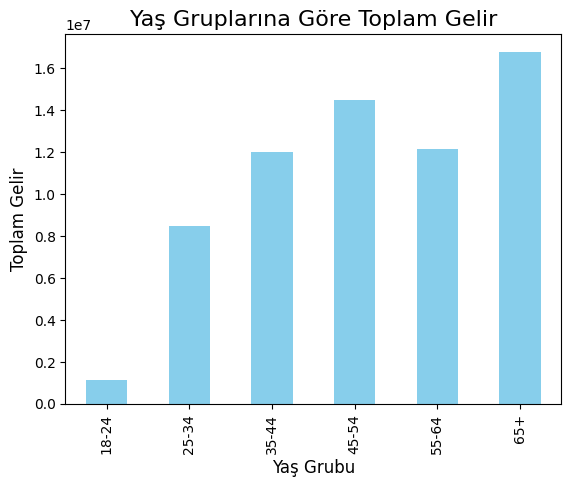

In [35]:
total_income_by_age_group = df.groupby('age_group')['price'].sum() # 5 . 1 de age_group tanımlandı.
print("Yaş Gruplarına Göre Toplam Gelir:")
print(total_income_by_age_group)

total_income_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Yaş Gruplarına Göre Toplam Gelir', fontsize=16)
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('Toplam Gelir', fontsize=12)
plt.show()

## 6.8 Genel Analiz
 - **`En yüksek gelir: 65+ yaş grubu`**, 16.8 milyon dolar ile en yüksek geliri sağlamaktadır, yaşlı bireylerin güçlü bir tüketici gücüne sahip olduğunu gösteriyor.
- **`En düşük gelir: 18-24 yaş grubu`**, sadece 1.1 milyon dolar ile toplam gelirin en küçük kısmını oluşturuyor.
- **`Orta yaş grupları: 35-44 yaş`** (12 milyon dolar) ve 45-54 yaş (14.5 milyon dolar ) grupları en yüksek gelirleri sağlayarak önemli bir pazar payı oluşturuyor.
- **`Genel gelir dağılımı: 45 yaş ve üzerindeki gruplar (35-64 yaş)`** toplam gelirin büyük kısmını (yaklaşık %60) oluşturuyor.
Özetle, yaşlılar ve orta yaş grupları, toplam gelire en büyük katkıyı sağlıyor, bu da onların ekonomik olarak önemli bir pazar olduğunu gösteriyor.

# 7 - Alışveriş Merkezlerine göre analizler.

## 7-1 Toplam Harcamanın Mağazalar Üzerindeki Yüzdesi

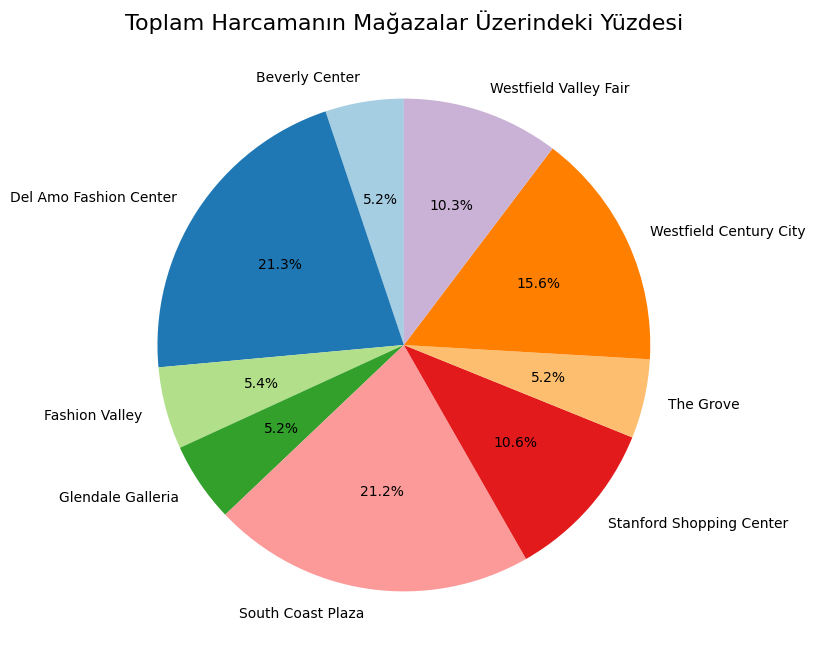

In [36]:
# Harcamayı hesaplama (quantity * price)
df['total_spent'] = df['quantity'] * df['price']

# Mağaza bazında toplam harcamayı hesapla
mall_spending = df.groupby('shopping_mall')['total_spent'].sum()
# Toplam harcamayı hesapla
total_spent = mall_spending.sum()
# Her mağazanın toplam harcamaya oranını hesapla
mall_spending_percentage = (mall_spending / total_spent) * 100

labels = mall_spending_percentage.index
sizes = mall_spending_percentage.values
colors = plt.cm.Paired(range(len(labels)))
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Toplam Harcamanın Mağazalar Üzerindeki Yüzdesi', fontsize=16)
plt.show()


## 7.2 - Alışveriş merkezlerinde bulunan mağaza sayısı 

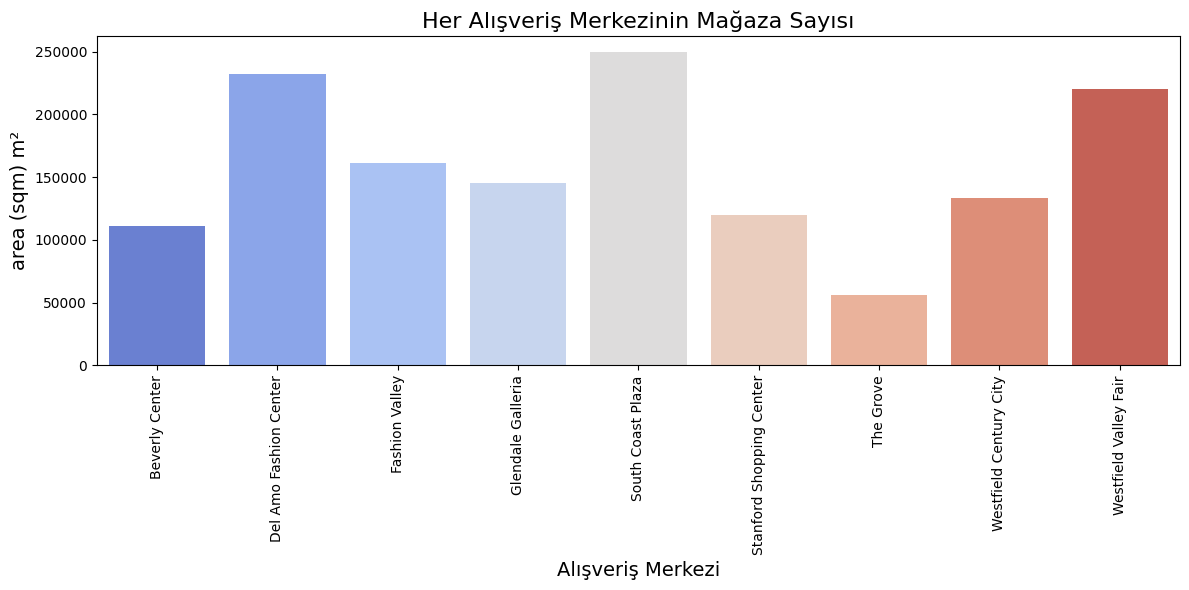

In [37]:
# Alışveriş merkezine göre mağaza sayısını grupluyoruz
store_count_per_mall = df.groupby('shopping_mall')['area (sqm)'].max().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='shopping_mall', y='area (sqm)', data=store_count_per_mall, palette='coolwarm')
plt.title("Her Alışveriş Merkezinin Mağaza Sayısı", fontsize=16)
plt.xlabel("Alışveriş Merkezi", fontsize=14)
plt.ylabel("area (sqm) m²", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 7.3 Alışveriş merkezlerine göre toplam satış ve kazanç

In [38]:

mall_sales = df.groupby('shopping_mall').agg(
    toplam_miktar=('quantity', 'sum'),
    toplam_kazanç=('price', 'sum'),
    yapim_yili=('construction_year', 'first')
).reset_index()

# Toplam kazanca göre azalan sırayla sıralama
mall_sales_sorted = mall_sales.sort_values(by='toplam_kazanç', ascending=False)

print(mall_sales_sorted)

              shopping_mall  toplam_miktar  toplam_kazanç  yapim_yili
1    Del Amo Fashion Center          60114    13851737.62        1961
4         South Coast Plaza          59457    13710755.24        1967
7    Westfield Century City          44894    10249980.07        1964
5  Stanford Shopping Center          30530     6937992.99        1956
8     Westfield Valley Fair          29465     6717077.54        1986
2            Fashion Valley          15234     3509649.02        1977
3         Glendale Galleria          14716     3414019.46        1976
6                 The Grove          14501     3390408.31        2002
0            Beverly Center          14852     3336073.82        1982


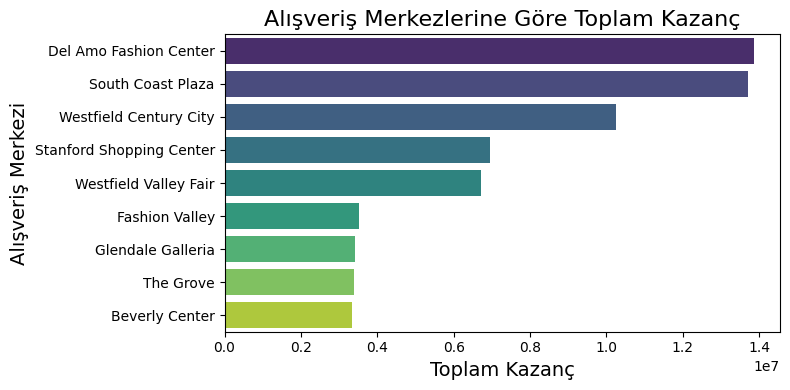

In [39]:

plt.figure(figsize=(8, 4))
sns.barplot(data=mall_sales_sorted, x='toplam_kazanç', y='shopping_mall', palette='viridis')
plt.title('Alışveriş Merkezlerine Göre Toplam Kazanç', fontsize=16)
plt.xlabel('Toplam Kazanç', fontsize=14)
plt.ylabel('Alışveriş Merkezi', fontsize=14)
plt.tight_layout()
plt.show()

## 7.4 Lokasyona Göre Satışlar

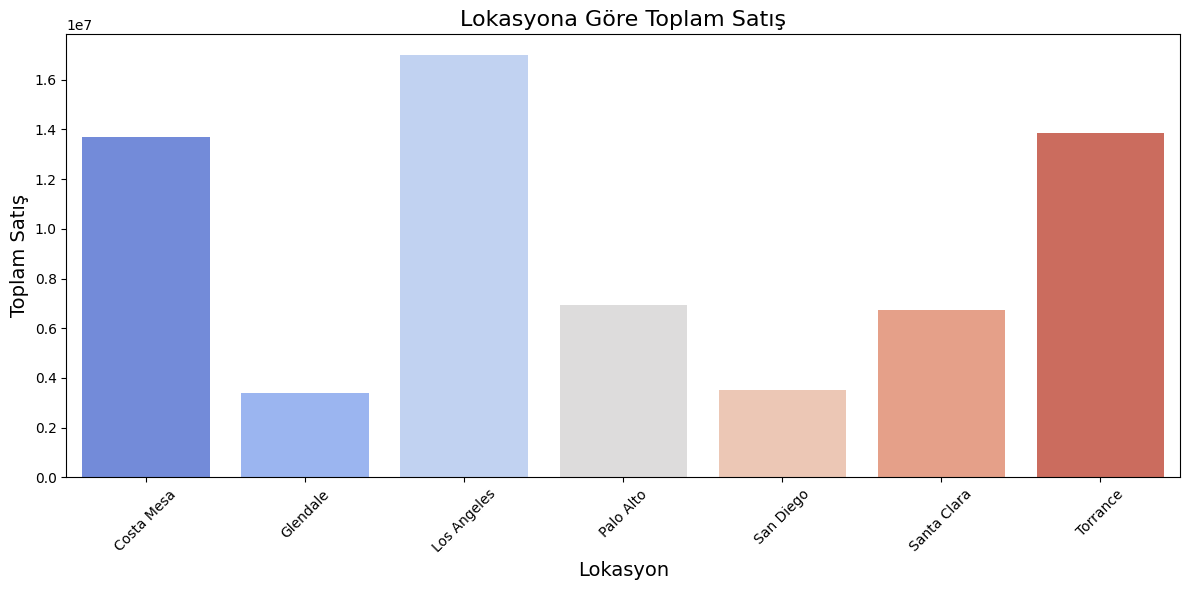

In [40]:
# her bir konum için toplam satışları ve benzersiz müşteri sayısını hesapla
location_sales = df.groupby('location').agg(
    total_sales=('price', 'sum'),
    customer_count=('customer_id', 'nunique')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=location_sales, x='location', y='total_sales', palette='coolwarm')
plt.title("Lokasyona Göre Toplam Satış", fontsize=16)
plt.xlabel("Lokasyon", fontsize=14)
plt.ylabel("Toplam Satış", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7.5 Alışveriş merkezlerinde kategoriye göre harcama

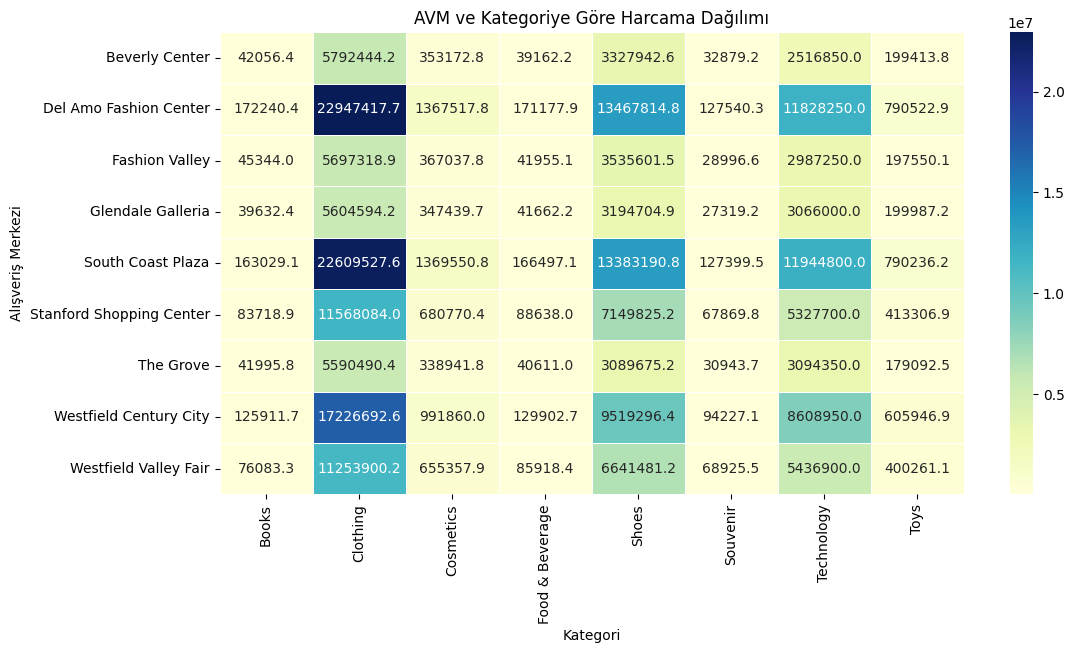

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Beverly Center,42056.40,5792444.24,353172.76,39162.24,3327942.65,32879.19,2516850.0,199413.76
Del Amo Fashion Center,172240.35,22947417.68,1367517.78,171177.90,13467814.80,127540.29,11828250.0,790522.88
Fashion Valley,45343.95,5697318.88,367037.82,41955.06,3535601.47,28996.56,2987250.0,197550.08
Glendale Galleria,39632.40,5604594.16,347439.70,41662.18,3194704.91,27319.17,3066000.0,199987.20
South Coast Plaza,163029.15,22609527.60,1369550.78,166497.05,13383190.83,127399.53,11944800.0,790236.16
Stanford Shopping Center,83718.90,11568084.00,680770.38,88638.04,7149825.21,67869.78,5327700.0,413306.88
The Grove,41995.80,5590490.40,338941.76,40610.95,3089675.16,30943.74,3094350.0,179092.48
Westfield Century City,125911.65,17226692.56,991860.04,129902.74,9519296.37,94227.09,8608950.0,605946.88
Westfield Valley Fair,76083.30,11253900.24,655357.88,85918.44,6641481.22,68925.48,5436900.0,400261.12


In [41]:
# Harcamaları hesaplama
df['toplam_harcama'] = df['price'] * df['quantity']
# Alışveriş merkezi ve kategori bazında gruplama
mall_category_spending = df.groupby(['shopping_mall', 'category'])['toplam_harcama'].sum().reset_index()

#Harcamaları sıralama (en çok harcanandan en aza)
mall_category_spending_sorted = mall_category_spending.sort_values(by=['shopping_mall', 'toplam_harcama'], ascending=[True, False])

# Her alışveriş merkezi için en çok harcanan kategoriyi bulma
most_spent_categories_per_mall = mall_category_spending_sorted.groupby('shopping_mall').first()
# print(most_spent_categories_per_mall)
#pivot
pivot_table = mall_category_spending.pivot(index='shopping_mall', columns='category', values='toplam_harcama')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('AVM ve Kategoriye Göre Harcama Dağılımı')
plt.ylabel('Alışveriş Merkezi')
plt.xlabel('Kategori')
plt.show()
pivot_table

In [42]:
# İşlem bazında toplam harcama hesaplama
df['total_spent'] = df['price'] * df['quantity']

# Kategori bazında toplam harcamaları hesaplama
category_spending = df.groupby('category')['total_spent'].sum().reset_index()

#En çok harcama yapılan kategoriyi bulma
most_spent_category = category_spending.loc[category_spending['total_spent'].idxmax()]
print("En çok harcama yapılan kategori:")
print(f"Kategori: {most_spent_category['category']}, Toplam Harcama: {most_spent_category['total_spent']}")


En çok harcama yapılan kategori:
Kategori: Clothing, Toplam Harcama: 108290469.76


                              Books     Clothing   Cosmetics  Food & Beverage  \
shopping_mall                                                                   
Stanford Shopping Center   83718.90  11568084.00   680770.38         88638.04   
Del Amo Fashion Center    172240.35  22947417.68  1367517.78        171177.90   
Westfield Century City    125911.65  17226692.56   991860.04        129902.74   
South Coast Plaza         163029.15  22609527.60  1369550.78        166497.05   
Glendale Galleria          39632.40   5604594.16   347439.70         41662.18   
Fashion Valley             45343.95   5697318.88   367037.82         41955.06   
Beverly Center             42056.40   5792444.24   353172.76         39162.24   
Westfield Valley Fair      76083.30  11253900.24   655357.88         85918.44   
The Grove                  41995.80   5590490.40   338941.76         40610.95   

                                Shoes   Souvenir  Technology       Toys  
shopping_mall                     

<Figure size 1200x800 with 0 Axes>

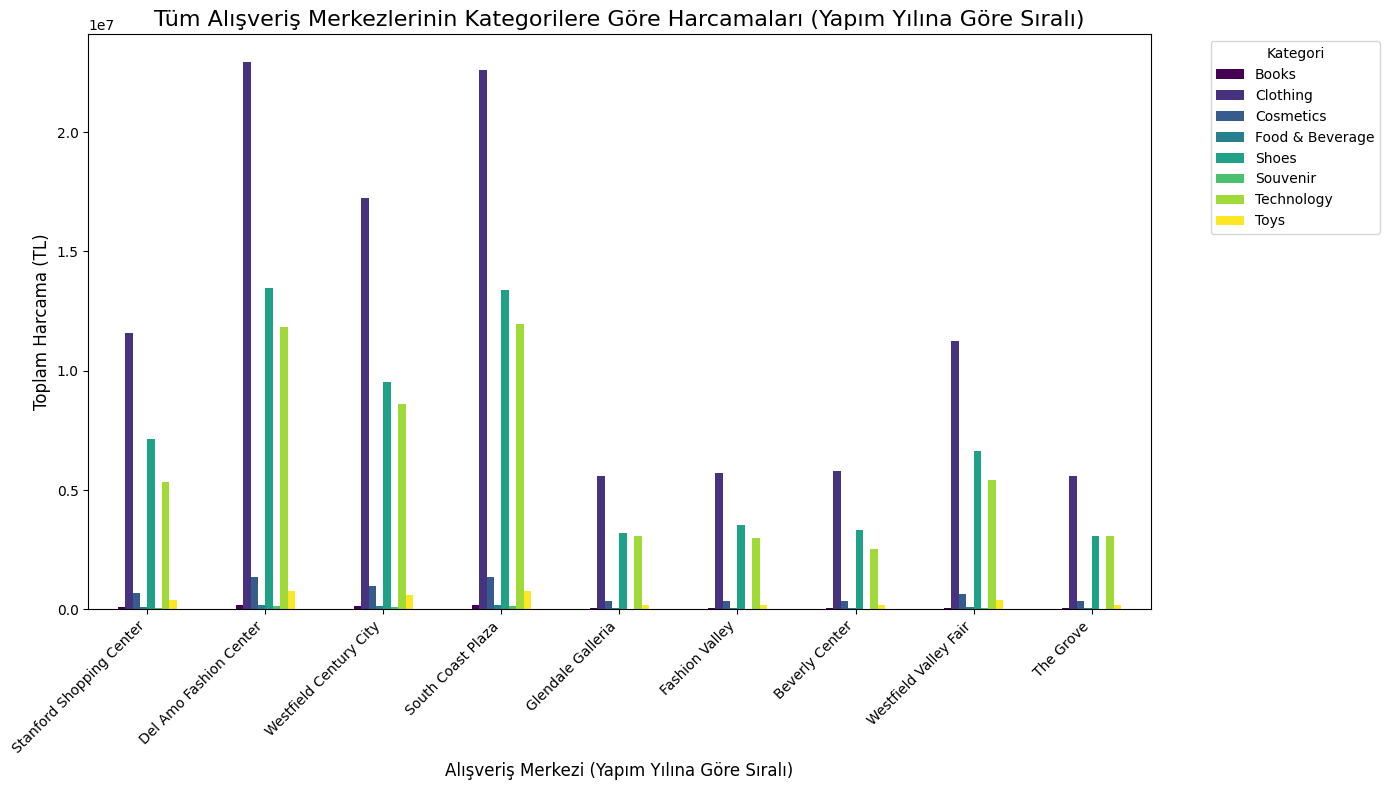

In [43]:
# Alışveriş merkezlerinin ve kategorilerinin toplam harcamalarını hesapl
mall_category_spending_sorted = (
    df.groupby(['shopping_mall', 'category'])['total_spent']
    # Alışveriş merkezi ve kategoriye göre grupla
    .sum()  # Her grup için toplam harcama hesaplıyoruz
    .unstack()  # Kategoriler sütunlara dönüşüyor, yani her kategori ayrı bir sütun
    .reset_index()  # İndeksi sıfırla
    .merge(
        df[['shopping_mall', 'construction_year']].drop_duplicates(),  # Yapım yılı bilgisini alıyoruz
        on='shopping_mall'  # Alışveriş merkezine göre birleştiriyoruz
    )
    .sort_values(by='construction_year')  # Yapım yılına göre sıralıyoruz
    .set_index('shopping_mall')  # Alışveriş merkezini indeks (satır adı) olarak belirle
    .drop(columns=['construction_year'])  # Yapım yılı sütununu kaldır
)

print(mall_category_spending_sorted)

plt.figure(figsize=(12, 8))
mall_category_spending_sorted.plot(kind='bar', stacked=False, colormap='viridis', figsize=(14, 8))

plt.title('Tüm Alışveriş Merkezlerinin Kategorilere Göre Harcamaları (Yapım Yılına Göre Sıralı)', fontsize=16)
plt.xlabel('Alışveriş Merkezi (Yapım Yılına Göre Sıralı)', fontsize=12)
plt.ylabel('Toplam Harcama (TL)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- ***`Alışveriş Merkezlerine Göre Detaylı Analiz`***
- ***Beverly Center***
- Genel Harcama Durumu : Düşük harcamalar.
- Öne Çıkan Kategoriler:
1. Giyim: 5,792,444.24
2. Ayakkabı: 3,327,942.65
3. Kitaplar: 42,056.40 (En az harcama yapılan kategori).
- ***Del Amo Fashion Center***
  - En Yüksek Toplam Harcama: Bu alışveriş merkezi, tüm kategorilerde en yüksek harcama yapılan yerlerden biri.
- Öne Çıkan Kategoriler:
1. Giyim: 22,947,417.68
2. Ayakkabı: 13,467,814.80
3. Teknoloji: 11,828,250.00
- ***Fashion Valley***
- Genel Harcama Durumu: Orta düzey harcamalar.
- Öne Çıkan Kategoriler:
1. Giyim: 5,697,318.88
2. Ayakkabı: 3,535,601.47
3. Hediyelik Eşyalar: 28,996.56 (En düşük harcamalardan biri).
- ***Glendale Galleria***
- Genel Harcama Durumu: Dengeli harcamalar.
- Öne Çıkan Kategoriler:
1. Giyim: 5,604,594.16
2. Ayakkabı: 3,194,704.91
3. Kozmetik ve oyuncak kategorilerinde nispeten düşük harcamalar.
- ***South Coast Plaza***
  - En Büyük İkinci Alışveriş Merkezi:
1. Giyim: 22,609,527.60
2. Ayakkabı: 13,383,190.83
3. Teknoloji: 11,944,800.00
- ***Stanford Shopping Center***
- Genel Harcama Durumu : Orta-üst düzey.
- Öne Çıkan Kategoriler:
1. Teknoloji: 5,327,700.00
2. Giyim: 11,568,084.00
3. Kitap ve hediyelik eşya harcamaları en düşük seviyelerde.
- ***Westfield Century City***
- Öne Çıkan Kategoriler:
1. Ayakkabı: 9,519,296.37
2. Teknoloji: 8,608,950.00
3. Oyuncaklar: 605,946.88 (Görece düşük).
- ***Westfield Valley Fair***
- Genel Harcama Durumu: Yüksek harcama yapan diğer bir alışveriş merkezi.
- Öne Çıkan Kategoriler:
1. Giyim: 11,253,900.24
2. Teknoloji: 5,436,900.00
3. Kozmetik: 655,357.88 (Daha az tercih edilmiş).
- ***`Kategori Bazlı Genel Eğilimler`***
- ***Giyim (Clothing):***
1. Tüm alışveriş merkezlerinde en çok tercih edilen kategori.
2. En yüksek harcama: Del Amo Fashion Center (22,947,417.68).
3. En düşük harcama: Beverly Center (5,792,444.24).
- ***Ayakkabı (Shoes):***
1. Giyimden sonra en popüler kategori.
2. En yüksek harcama: Del Amo Fashion Center (13,467,814.80).
3. En düşük harcama: Fashion Valley (3,535,601.47).
- ***Teknoloji (Technology):***
1. Lider Alışveriş Merkezleri:
   - South Coast Plaza (11,944,800.00)
   - Del Amo Fashion Center (11,828,250.00)
- ***Kitaplar (Books):***
1. Tüm alışveriş merkezlerinde en düşük harcama kategorisi.
2. En düşük harcama: Beverly Center (42,056.40).
## Yapım Yılı Etkisi

#### ***Eski Alışveriş Merkezleri (1950-1980)***

- *`Del Amo Fashion Center`* (1961) ve *`South Coast Plaza`* (1967), oldukça eski olmalarına rağmen yüksek gelir elde etmişlerdir. Bu, köklü alışveriş merkezlerinin sadık bir müşteri kitlesine sahip olabileceğini veya geçmişten gelen bir itibarla faaliyet gösterdiklerini gösterebilir.

#### ***Yeni Alışveriş Merkezleri (1980 Sonrası)***

- *`The Grove (2002)`*, daha yeni olmasına rağmen gelir açısından alt sıralarda. Bu, müşteri kitlesini henüz tam olarak kazanamamış olabileceğini veya daha az yoğun bir alışveriş merkezi olduğunu gösterebilir.
ebilir.

### Ürün Miktarı ve Gelir İlişkisi
- ***Yüksek Ürün Miktarı ile Yüksek Gelir***

Del Amo Fashion Center ve South Coast Plaza, hem toplam ürün miktarı hem de toplam gelir açı
sından ön sıralarda. Bu durum, yüksek müşteri trafiğini veya geniş ürün yelpazesini yansıtabilir.
- ***Düşük Ürün Miktarı ile Yüksek Gelir***

Westfield Century City, daha az ürün satılmasına rağmen yüksek gelir elde etmiş. Bu, lüks markaların veya yüksek fiyatlı ürünlerin satışının yoğun olduğunu gösterebilir.

- ***Düşük Ürün Miktarı ve Gelir***

The Grove ve Beverly Center, her iki açıdan da düşük seviyelerde yer alıyor. Bu, bu alışveriş merkezlerinin daha küçük ölçekli veya müşteri trafiğinin daha az olduğu anlamına gelebilir.

# 8 - Kategoriye göre satışlar

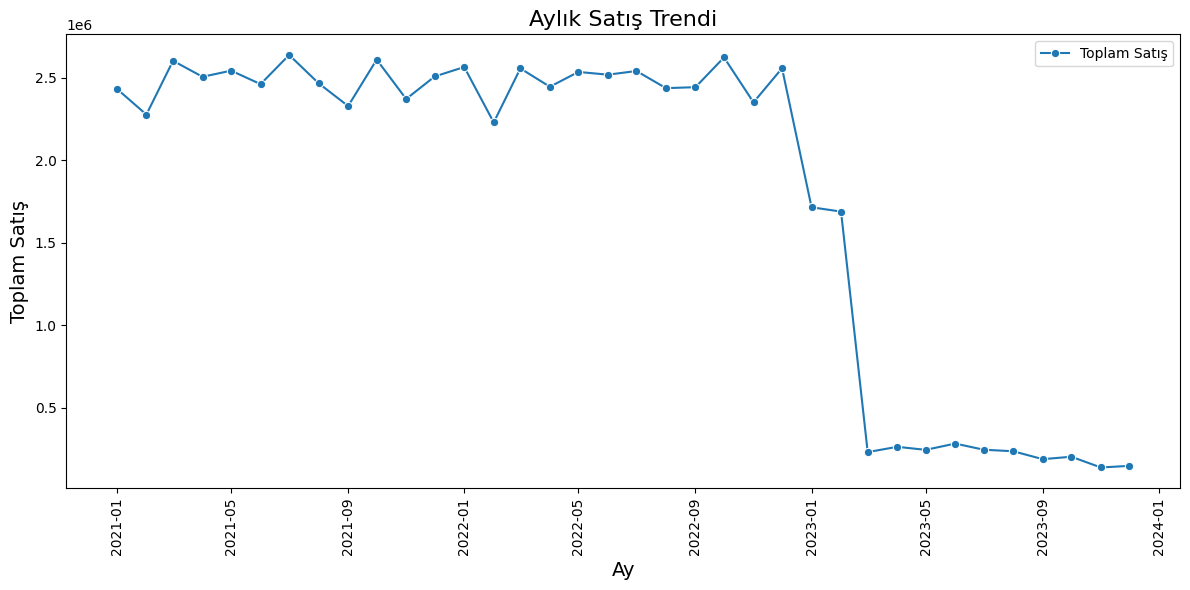

In [44]:

# Aylık bazda gruplama işlemi
# 'dt.to_period("M")' ile tarihler sadece yıl ve ay bilgisini içerecek şekilde gruplandırılır.
# 'price' sütunundaki değerlerin toplamını alıyoruz ('total_sales') ve
# her ay için benzersiz fatura sayısını ('transaction_count') hesaplıyoruz.
monthly_sales = df.groupby(df['invoice date'].dt.to_period('M')).agg(
    total_sales=('price', 'sum'),  # Aylık toplam satış tutarı
    transaction_count=('invoice_no', 'nunique')  # Benzersiz fatura sayısı
).reset_index()

# 'to_period' işlemiyle elde edilen periyotları tekrar datetime formatına çevir.
# Bu işlem, görselleştirme sırasında eksenlerin doğru şekilde işlenmesini sağlar.
monthly_sales['invoice date'] = monthly_sales['invoice date'].dt.to_timestamp()

# Grafik oluşturma
plt.figure(figsize=(12, 6))  # Grafik boyutlarını belirtiyoruz.

# Aylık toplam satışları gösteren bir çizgi grafiği oluşturuyoruz.
# 'marker="o"' ile her bir veri noktasını işaretliyoruz.
sns.lineplot(data=monthly_sales, x='invoice date', y='total_sales', marker='o', label='Toplam Satış')
plt.title("Aylık Satış Trendi", fontsize=16)
plt.xlabel("Ay", fontsize=14)
plt.ylabel("Toplam Satış", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()


## 8.1 Seçilen Kategoriye Göre Aylık Satış Trendi

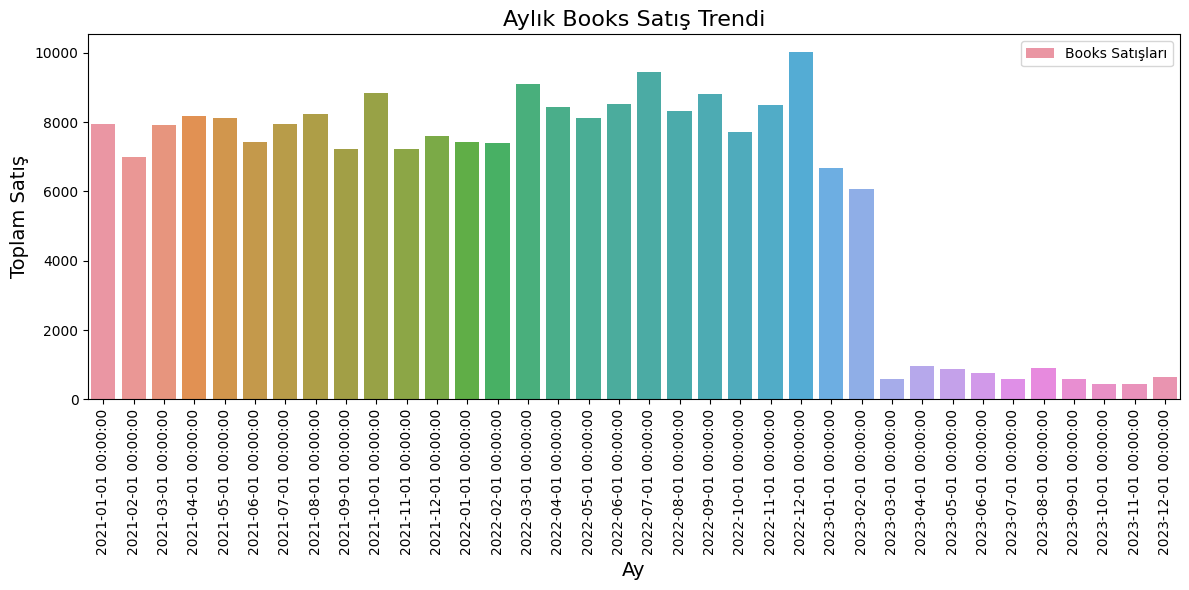

In [45]:
selected_category = 'Books'  # Buraya analiz etmek istediğiniz kategoriyi yazabilirsiniz.

# Fatura tarihini datetime formatına çeviriyoruz.
df['invoice_date'] = pd.to_datetime(df['invoice date'], errors='coerce')
# Kullanıcının seçtiği kategoriye ait verileri filtreliyoruz.
category_data = df[df['category'] == selected_category]

# Aylık bazda gruplama işlemi
# 'price' sütunundaki değerlerin toplamını ve benzersiz fatura sayısını hesaplıyoruz.
monthly_sales = category_data.groupby(category_data['invoice_date'].dt.to_period('M')).agg(
    total_sales=('price', 'sum'),  # Aylık toplam satış tutarı
    transaction_count=('invoice_no', 'nunique')  # Benzersiz fatura sayısı
).reset_index()

# 'to_period' işlemiyle elde edilen periyotları tekrar datetime formatına çeviriyoruz.
monthly_sales['invoice_date'] = monthly_sales['invoice_date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='invoice_date', y='total_sales', label=f'{selected_category} Satışları')

plt.title(f"Aylık {selected_category} Satış Trendi", fontsize=16)
plt.xlabel("Ay", fontsize=14)
plt.ylabel("Toplam Satış", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()


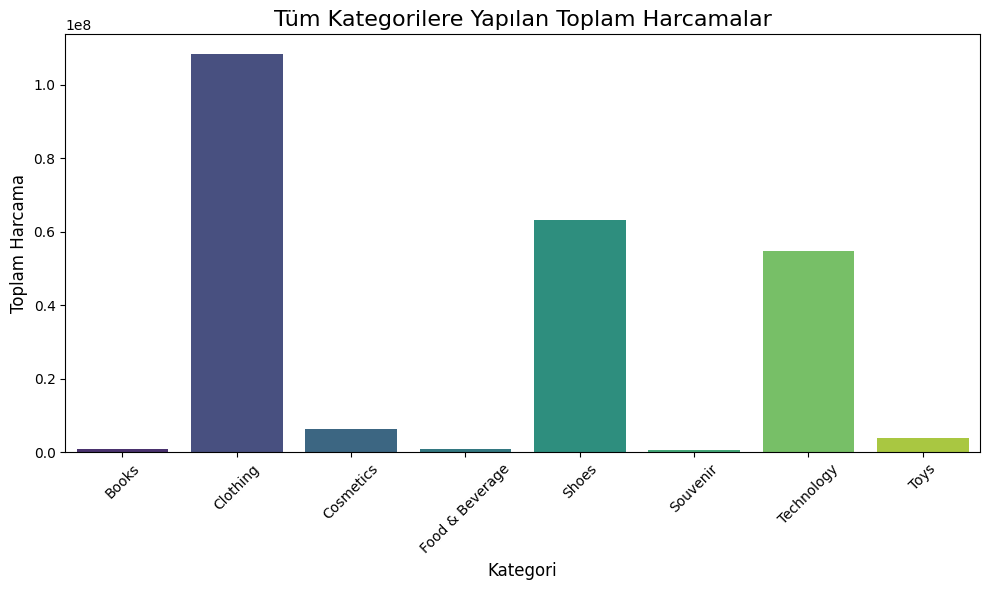

In [46]:
# İşlem bazında toplam harcama hesaplama
df['total_spent'] = df['price'] * df['quantity']

#Kategori bazında toplam harcamaları hesaplama
category_spending = df.groupby('category')['total_spent'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=category_spending, x='category', y='total_spent', palette='viridis')
plt.title('Tüm Kategorilere Yapılan Toplam Harcamalar', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Toplam Harcama', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9 - Ödeme yöntemleriyle yapılan analizler.

## 9.1 Ay bazında kullanılan ödeme yöntemleri

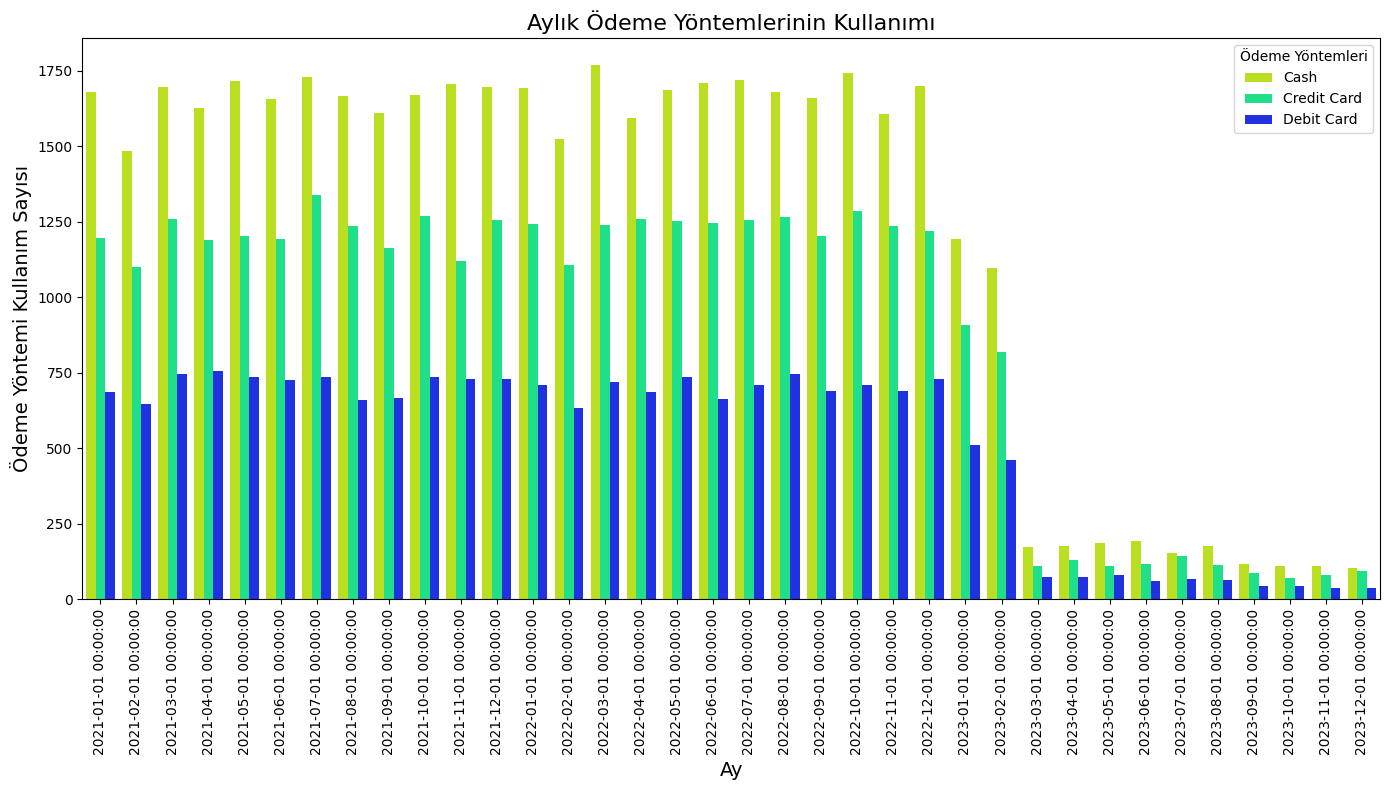

In [47]:
# Fatura tarihine göre ay bilgisini elde ediyoruz.
df['month'] = df['invoice_date'].dt.to_period('M')

# Ay ve ödeme yöntemi bazında gruplama işlemi
monthly_payment_data = df.groupby(['month', 'payment_method']).size().reset_index(name='count')

# Ayları datetime formatına çeviriyoruz.
monthly_payment_data['month'] = monthly_payment_data['month'].dt.to_timestamp()
plt.figure(figsize=(14, 8))
sns.barplot(
    data=monthly_payment_data,
    x='month',
    y='count',
    hue='payment_method',  # Ödeme yöntemlerini farklı renklerle gösteriyoruz.
    palette="gist_rainbow"
)
plt.title("Aylık Ödeme Yöntemlerinin Kullanımı", fontsize=16)
plt.xlabel("Ay", fontsize=14)
plt.ylabel("Ödeme Yöntemi Kullanım Sayısı", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title="Ödeme Yöntemleri")
plt.show()

## 9.2 Alışveriş merkezi bazında kullanılan ödeme yöntemleri

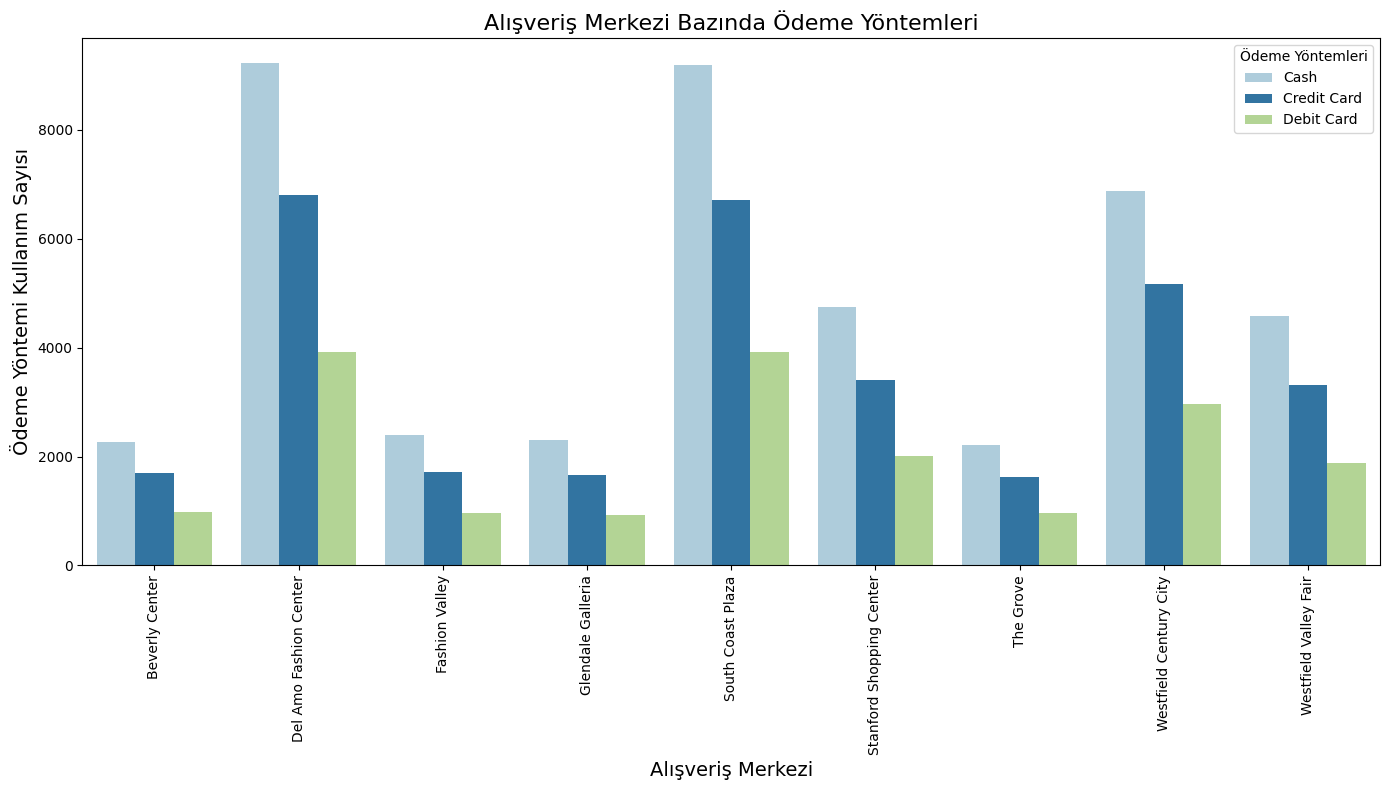

In [48]:
# Ödeme yöntemlerini ve alışveriş merkezlerini analiz ediyoruz.
mall_payment_data = df.groupby(['shopping_mall', 'payment_method']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))

sns.barplot(
    data=mall_payment_data, 
    x='shopping_mall', 
    y='count', 
    hue='payment_method',  # Ödeme yöntemlerini farklı renklerle gösteriyoruz.
    palette="Paired"
)

plt.title("Alışveriş Merkezi Bazında Ödeme Yöntemleri", fontsize=16)
plt.xlabel("Alışveriş Merkezi", fontsize=14)
plt.ylabel("Ödeme Yöntemi Kullanım Sayısı", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title="Ödeme Yöntemleri")
plt.show()

## 9.3 Ödeme yöntemine göre toplam işlem sayısı

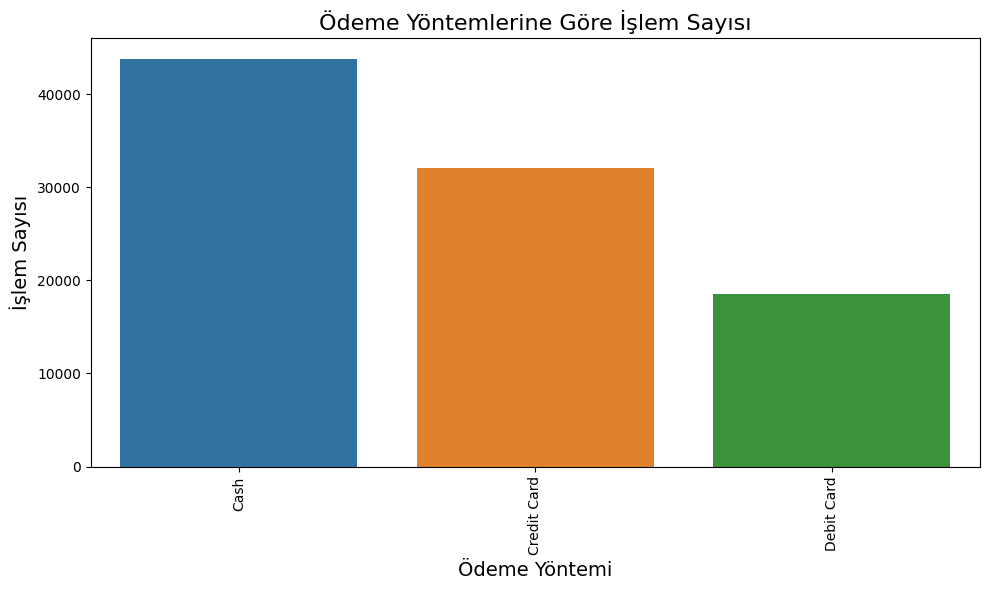

In [49]:
# Ödeme yöntemlerine göre toplam işlem
payment_sales = df.groupby('payment_method').agg(
    total_sales=('price', 'sum'),
    transaction_count=('invoice_no', 'nunique')
).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_sales, x='payment_method', y='transaction_count')
plt.title("Ödeme Yöntemlerine Göre İşlem Sayısı", fontsize=16)
plt.xlabel("Ödeme Yöntemi", fontsize=14)
plt.ylabel("İşlem Sayısı", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 9.4 Ödeme yönteminin lokasyona göre hacmi

## 9.5 Genel Analiz
0. Ödeme yöntemlerine genel bir bakışla baktığımızda 3 ödeme yöntemi içeriyor *`Cash`* - *`Credit Card`* ve *`Debit Card`*
1. Ödeme Yöntemi Dağılımı :
- **Cash (Nakit):**
En çok tercih edilen ödeme yöntemi, özellikle Los Angeles ve Torrance'ta belirgin bir şekilde yüksek.
- **Credit Card (Kredi Kartı):**
İkinci en popüler yöntem.
Yüksek kullanım oranı, Los Angeles ve Torrance'ta görülüyor.
- **Debit Card (Banka Kartı):**
En az tercih edilen yöntem.
2. Lokasyon Bazında Değerlendirme : 
- **Los Angeles:**
En yüksek toplam işlem sayısına sahip (Cash: 11,357).
Tüm ödeme yöntemlerinde diğer lokasyonlardan önde.
- **Torrance:**
Cash ödemede ikinci sırada (9,223).
Diğer yöntemlerde Los Angeles'tan sonra yüksek işlem hacmine sahip.
- **Glendale ve San Diego:**
En düşük toplam işlem hacmine sahip lokasyonlar.
Nakit ödemeler bu iki lokasyonda da diğer yöntemlere göre daha fazla kullanılmış.
**Palo Alto** ve **Santa Clara**'da görece daha düşük işlem hacmine sahip.
3. Alışveriş Merkezleri:
- **Del Amo Fashion Center:**
En yüksek toplam işlem sayısına sahip (19,943 işlem).
Her üç ödeme yönteminde de lider durumda.
- **South Coast Plaza:**
Nakit işlemlerde ikinci sırada (9,185 işlem).
Genel olarak yüksek işlem hacmine sahip.
- **Westfield Century City:**
Nakit dışındaki yöntemlerde üst sıralarda, özellikle kredi kartı işlemleri öne çıkıyor (5,164 işlem).


# 10 - Satışlara göre yapılan analizler.

## 10.1 Aylık satış trendlerini hesaplama

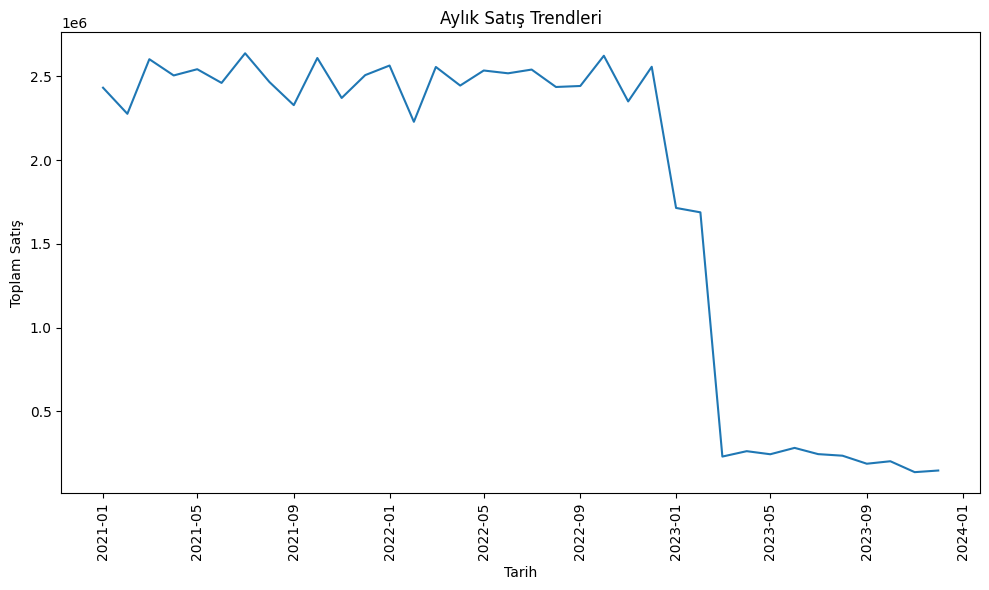

,invoice date,price
0,2021-01-01,2432254.59
1,2021-02-01,2276456.61
2,2021-03-01,2602412.30
3,2021-04-01,2505434.60
4,2021-05-01,2542580.56
5,2021-06-01,2460888.73
6,2021-07-01,2637747.54
7,2021-08-01,2466120.79
8,2021-09-01,2328086.01
9,2021-10-01,2609469.75


In [50]:
# Aylık satış trendlerini hesaplama
sales_trend = df.groupby(
    df['invoice date'].dt.to_period('M')
)['price'].sum().reset_index()
sales_trend['invoice date'] = sales_trend['invoice date'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
sns.lineplot(x='invoice date', y='price', data=sales_trend)
plt.title("Aylık Satış Trendleri")
plt.xlabel("Tarih")
plt.ylabel("Toplam Satış")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
sales_trend


## 10.2 Aylık Kategori Bazında Satışları Hesaplama

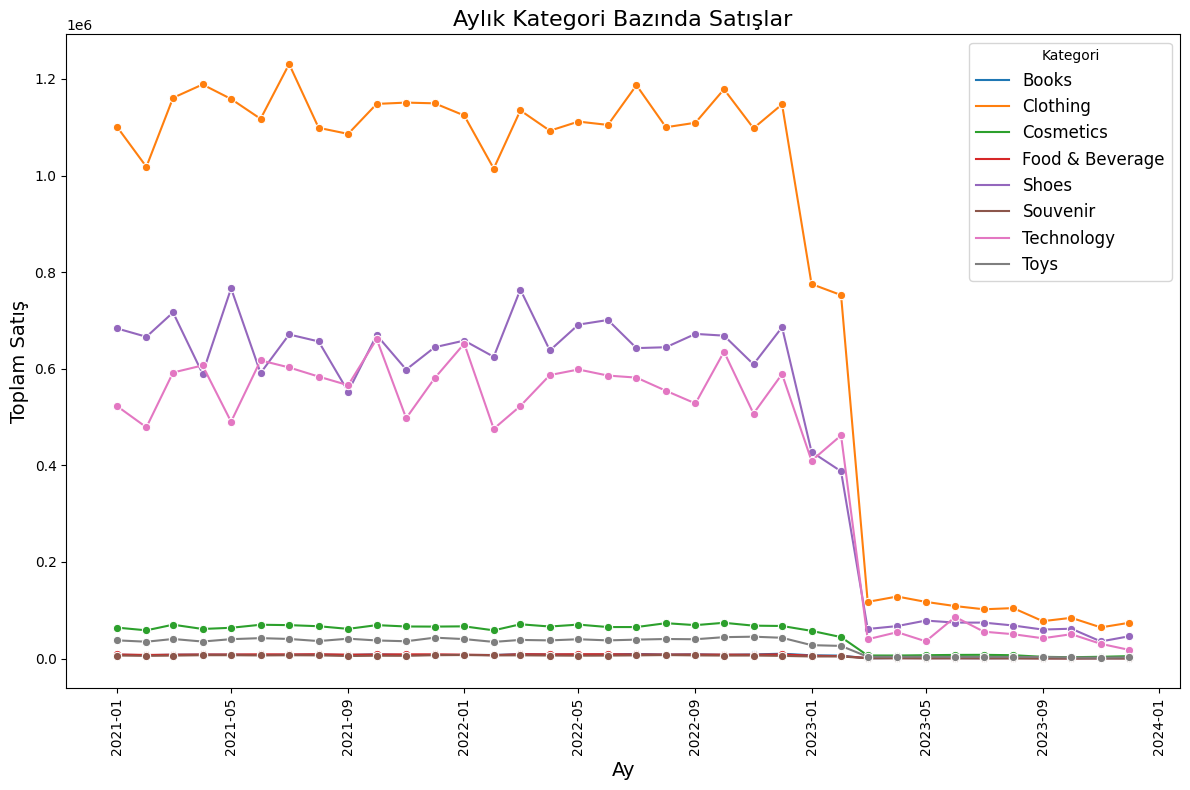

In [51]:
# price sütununu numeric formatına dönüştürme
df['price'] = pd.to_numeric(df['price'], errors='coerce')
# Aylık kategori bazında satışları gruplama
monthly_category_sales = df.groupby([
    df['invoice date'].dt.to_period('M'),  # Aylık gruplama
    'category'  # Kategoriye göre gruplama
])['price'].sum().reset_index()

# Tarih formatını datetime olarak dönüştürme
monthly_category_sales['invoice date'] = monthly_category_sales['invoice date'].dt.to_timestamp()

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=monthly_category_sales,
    x='invoice date',
    y='price',
    hue='category',  # Her kategori farklı bir renk
    marker='o'       
)
plt.title("Aylık Kategori Bazında Satışlar", fontsize=16)
plt.xlabel("Ay", fontsize=14)
plt.ylabel("Toplam Satış", fontsize=14)
plt.xticks(rotation=90)
plt.legend(title="Kategori", fontsize=12)
plt.tight_layout()
plt.show()

## 10.3 Aylık kategori bazında satışların analizi
1. ****Genel Gözlemler****
Tarih Aralığı: Veriler Ocak 2021'den Aralık 2023'e kadar 36 aylık bir dönemi kapsıyor.
Fiyat Seviyeleri:
En yüksek değer: 2,637,747.54 (Temmuz 2021).
En düşük değer: 137,609.90 (Kasım 2023).
2021 ve 2022 yıllarında fiyatlar genel olarak 2 milyon - 2.6 milyon aralığında. Ancak 2023 yılında fiyatlar 200 bin seviyelerine ciddi bir düşüş göstermiş.
2. ****Yıllık Bazda Değerlendirme****
2021: Fiyatlar yıl boyunca 2.2 milyon ile 2.6 milyon arasında dalgalanmış. En yüksek satış Mart 2021'de olmuş (2,602,412.30).
2022: Fiyatlar benzer bir aralıkta, ancak genel olarak 2021'e göre hafif bir düşüş gözleniyor.
2023: Fiyatlarda dramatik bir düşüş gözleniyor. Ocak 2023'te başlayan bu düşüş, yılın ikinci yarısında 200 bin seviyelerine kadar gerilemiş.
3. ***Sezonluk Değerlendirme***
2021 ve 2022'de belirgin bir sezonluk dalgalanma yok. Fiyatlar yıl boyunca istikrarlı.
2023'teki düşüş, Ocak ayından itibaren başlamış ve yılın geri kalanında kademeli olarak azalmış. Bu durum bir ekonomik kriz, talep azalması veya başka bir dış faktör kaynaklı olabilir.
1. ***Kategoriler Arası Karşılaştırma***
- **Clothing (Giyim):** En yüksek satış hacmine sahip kategori. Özellikle 2021 yılı boyunca çok yüksek gelirler üretilmiş ve bu eğilim 2022 yılına kadar nispeten güçlü şekilde devam etmiş. Ancak 2023 yılında ciddi bir düşüş yaşanmış.
- **Shoes (Ayakkabı):** Giyim kategorisini takip eden önemli bir kategori. Ayakkabı satışları da özellikle 2021 ve 2022 yıllarında güçlü bir şekilde devam ederken, 2023 yılında kayda değer bir düşüş görülüyor.
- **Technology (Teknoloji):** Düzenli ve istikrarlı bir satış düzeyine sahip. Bu kategori, genellikle 500.000 civarında bir seviyeyi koruyor ancak 2023 yılında keskin bir düşüş yaşanıyor.
- **Books (Kitaplar) ve Cosmetics (Kozmetik):** Orta düzeyde satışa sahip kategoriler. Kozmetik kategorisi daha sabit bir çizgide ilerlerken, kitap satışları da 2023 yılında belirgin bir düşüş göstermiş.
- **Food & Beverage (Gıda ve İçecek) ve Souvenir (Hediyelik Eşya):** En düşük gelir elde eden kategoriler arasında yer alıyor. Ancak bu kategorilerdeki düşüş, toplam gelir üzerinde fazla etkili değil.
5. ***Zaman İçinde Satış Trendleri***
- **2021 Yılı:** Neredeyse tüm kategoriler için satışların zirvede olduğu yıl. Bu yıl, tüketici harcamalarının en yüksek olduğu dönem olarak öne çıkıyor.
- **2022 Yılı:** Satışların yavaş yavaş düşüşe geçtiği bir yıl. Özellikle Giyim ve Ayakkabı kategorilerinde satışlar daha düşük bir ivme ile devam etmiş.
- **2023 Yılı:** Satışlarda genel bir çöküş yaşanıyor. Bu, ya ekonomik faktörlere ya da sektörel değişikliklere bağlanabilir. Özellikle Giyim ve Ayakkabı kategorilerindeki dramatik düşüş dikkat çekiyor.
